> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import wptools
import os
import requests
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df =  pd.read_csv('tmdb-movies.csv')
print(df.shape)
df.count()

(10866, 21)


id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

In [3]:
df.drop('homepage',axis=1,inplace = True)
df.drop('tagline',axis=1,inplace = True)
df.drop('imdb_id',axis=1,inplace = True)
df.drop('overview',axis=1,inplace = True)
df = df[df['genres'].notna()]



In [4]:
df.count()

id                      10843
popularity              10843
budget                  10843
revenue                 10843
original_title          10843
cast                    10768
director                10801
keywords                 9368
runtime                 10843
genres                  10843
production_companies     9827
release_date            10843
vote_count              10843
vote_average            10843
release_year            10843
budget_adj              10843
revenue_adj             10843
dtype: int64

In [5]:
df.director

0           Colin Trevorrow
1             George Miller
2          Robert Schwentke
3               J.J. Abrams
4                 James Wan
                ...        
10861           Bruce Brown
10862    John Frankenheimer
10863        Eldar Ryazanov
10864           Woody Allen
10865      Harold P. Warren
Name: director, Length: 10843, dtype: object

In [6]:
df[df.revenue == df.revenue.max()]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


In [6]:
df_genres =  pd.read_csv('Genres.csv')

df_genres

,Family,Documentary,Romance,History,Crime,Mystery,Western,Horror,Drama,Action,Animation,War,Science Fiction,TV Movie,Comedy,Music,Foreign,Fantasy,Thriller,Adventure
0,Minions,Amy,Cinderella,Spotlight,Furious 7,The Hateful Eight,The Revenant,Goosebumps,The Revenant,Jurassic World,Minions,The Hunger Games: Mockingjay - Part 2,Jurassic World,The Hollow,Minions,Pitch Perfect 2,L'ArmÃ©e du crime,Star Wars: The Force Awakens,Jurassic World,Jurassic World
1,Inside Out,Racing Extinction,Fifty Shades of Grey,Steve Jobs,Spectre,Tomorrowland,The Hateful Eight,The Witch,The Martian,Mad Max: Fury Road,Inside Out,Eye in the Sky,Mad Max: Fury Road,Crown for Christmas,Inside Out,Straight Outta Compton,Beautiful Kate,Jupiter Ascending,Mad Max: Fury Road,Mad Max: Fury Road
2,Cinderella,Cobain: Montage of Heck,Brooklyn,In the Heart of the Sea,The Hateful Eight,Mr. Holmes,Slow West,Knock Knock,Ex Machina,Star Wars: The Force Awakens,The Good Dinosaur,Macbeth,Insurgent,12 Gifts of Christmas,Pixels,Magic Mike XXL,Seulpeumboda deo seulpeun Iyagi,Cinderella,Insurgent,Insurgent
3,Tomorrowland,Hot Girls Wanted,The Age of Adaline,Queen of the Desert,Taken 3,Solace,Bone Tomahawk,Poltergeist,The Hateful Eight,Furious 7,Home,Little Boy,Star Wars: The Force Awakens,The Lion Guard: Return of the Roar,The Big Short,Ricki and the Flash,Merantau,The Good Dinosaur,Furious 7,Star Wars: The Force Awakens
4,The Good Dinosaur,Cartel Land,Paper Towns,The 33,Kingsman: The Secret Service,Run All Night,The Ridiculous 6,Maggie,Cinderella,Terminator Genisys,The Peanuts Movie,Rock the Kasbah,Terminator Genisys,Bad Hair Day,Ted 2,We Are Your Friends,Contracorriente,The Last Witch Hunter,The Revenant,The Revenant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alfie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Chase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Ugly Dachshund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seconds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_genres.dropna(how='all')

,Family,Documentary,Romance,History,Crime,Mystery,Western,Horror,Drama,Action,Animation,War,Science Fiction,TV Movie,Comedy,Music,Foreign,Fantasy,Thriller,Adventure
0,Minions,Amy,Cinderella,Spotlight,Furious 7,The Hateful Eight,The Revenant,Goosebumps,The Revenant,Jurassic World,Minions,The Hunger Games: Mockingjay - Part 2,Jurassic World,The Hollow,Minions,Pitch Perfect 2,L'ArmÃ©e du crime,Star Wars: The Force Awakens,Jurassic World,Jurassic World
1,Inside Out,Racing Extinction,Fifty Shades of Grey,Steve Jobs,Spectre,Tomorrowland,The Hateful Eight,The Witch,The Martian,Mad Max: Fury Road,Inside Out,Eye in the Sky,Mad Max: Fury Road,Crown for Christmas,Inside Out,Straight Outta Compton,Beautiful Kate,Jupiter Ascending,Mad Max: Fury Road,Mad Max: Fury Road
2,Cinderella,Cobain: Montage of Heck,Brooklyn,In the Heart of the Sea,The Hateful Eight,Mr. Holmes,Slow West,Knock Knock,Ex Machina,Star Wars: The Force Awakens,The Good Dinosaur,Macbeth,Insurgent,12 Gifts of Christmas,Pixels,Magic Mike XXL,Seulpeumboda deo seulpeun Iyagi,Cinderella,Insurgent,Insurgent
3,Tomorrowland,Hot Girls Wanted,The Age of Adaline,Queen of the Desert,Taken 3,Solace,Bone Tomahawk,Poltergeist,The Hateful Eight,Furious 7,Home,Little Boy,Star Wars: The Force Awakens,The Lion Guard: Return of the Roar,The Big Short,Ricki and the Flash,Merantau,The Good Dinosaur,Furious 7,Star Wars: The Force Awakens
4,The Good Dinosaur,Cartel Land,Paper Towns,The 33,Kingsman: The Secret Service,Run All Night,The Ridiculous 6,Maggie,Cinderella,Terminator Genisys,The Peanuts Movie,Rock the Kasbah,Terminator Genisys,Bad Hair Day,Ted 2,We Are Your Friends,Contracorriente,The Last Witch Hunter,The Revenant,The Revenant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alfie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Chase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Ugly Dachshund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seconds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['Date'] = pd.to_datetime(df.release_year,format='%Y')
df['Year'] = df['Date'].dt.year

Int64Index([2014, 2013, 2015, 2012, 2011, 2009, 2008, 2010, 2007, 2006, 2005,
            2004, 2003, 2002, 2001, 2000, 1999, 1998, 1996, 1997, 1994, 1993,
            1995, 1988, 1989, 1991, 1992, 1990, 1987, 1986, 1985, 1984, 1981,
            1982, 1983, 1980, 1978, 1979, 1977, 1973, 1971, 1976, 1966, 1974,
            1975, 1964, 1972, 1967, 1970, 1968, 1965, 1963, 1962, 1960, 1969,
            1961],
           dtype='int64')
                2014 2013 2015 2012 2011 2009 2008 2010 2007 2006  ... 1972  \
Action           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Adventure        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Science Fiction  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Thriller         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Action           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Mystery     

Comedy
Documentary
we are here
Action|Adventure|Drama
Mystery|Comedy
Action|Comedy
Horror
1967
Family|Animation|Adventure
we are here
we are here
we are here
Comedy|Drama|Romance
we are here
we are here
we are here
Adventure|Action|Comedy
we are here
Action|Thriller|Adventure
we are here
Crime|Drama
we are here
Drama|Romance
Crime|Drama
Crime|Drama|Thriller
Comedy|Horror
we are here
Comedy
Thriller
Action|Adventure|War
we are here
Crime|Drama|Mystery|Thriller
we are here
Drama|Action|Thriller|Crime|Mystery
Drama
Comedy|Drama|Romance
Horror|Science Fiction
we are here
Crime|Drama
Comedy|Drama|Romance
Comedy
Adventure|Fantasy|Comedy|Family|Music
we are here
we are here
Action|Drama|Western
we are here
Music|Drama|Romance
Comedy|Romance
Comedy|Drama|Romance
Action|Adventure|Crime|Drama|Mystery
Western
Comedy|Romance
Music
Horror|Comedy|Science Fiction
Science Fiction
Fantasy|Comedy|Romance
Documentary|Music
we are here
Fantasy|Comedy|Family
Comedy|Music|Romance
Horror|Science Fiction
Anim

Documentary|War
we are here
1975
Drama
we are here
Horror|Thriller|Adventure
we are here
we are here
we are here
Adventure|Comedy|Fantasy
we are here
we are here
Comedy|Horror|Music|Science Fiction
we are here
we are here
Drama|Romance|War
we are here
we are here
Comedy
Adventure|Drama
Drama
Action|Thriller|Mystery
we are here
we are here
Thriller|Horror|War
Drama|Science Fiction|Comedy
Action|Comedy|Science Fiction
Comedy|History
we are here
Adventure|Fantasy|Science Fiction|Family
we are here
Fantasy|Science Fiction
Thriller|Drama|Mystery
Action|Crime|Drama|Thriller
we are here
Drama
Comedy
Drama|Music
Thriller|Western|Mystery
we are here
Music|Drama
Horror|Mystery|Science Fiction
Adventure|Fantasy|Science Fiction
Comedy|Crime|Mystery
Crime|Drama|Thriller
Action|Adventure|Crime|Drama|Mystery
Horror|Science Fiction
Science Fiction|Horror|Mystery
Comedy
Adventure|Action|Science Fiction
History|Drama|Thriller
Thriller|Drama
Comedy|Drama|Romance
Action|Adventure|Drama|History
Western
Hor

Science Fiction
Comedy|Romance
Drama|Music
Fantasy|Music|Romance
Western|History
Horror
Horror|Science Fiction
Fantasy|Horror|Thriller|Science Fiction|Mystery
Action|Drama|Thriller
Action|Adventure|Comedy|Drama
Adventure|Horror|Mystery|Thriller
Adventure|Action|Thriller
Drama|Thriller
Comedy|Fantasy
Horror|Thriller
Horror
Drama|Action|Thriller|Crime
Action|Adventure|Comedy|Thriller
Action|Comedy|Drama|Thriller
Comedy|Horror
1981
Adventure|Action
we are here
we are here
Romance|Comedy
we are here
we are here
Adventure|Action|Thriller
we are here
Adventure|Animation|Drama|Family
we are here
we are here
we are here
Adventure|Action|Thriller|Science Fiction
we are here
Comedy
Horror|Comedy
we are here
Animation|Science Fiction
Horror
Science Fiction|Action
Adventure
Drama
Drama|History
we are here
Horror|Thriller
Action|Drama|History|Thriller
Adventure|War|Drama|History
we are here
Horror|Thriller
Romance|Crime|Drama
we are here
Comedy|Drama|Romance
Thriller|Horror|Mystery
we are here
Roma

Adventure|Fantasy|Thriller
Horror|Action
Documentary
Music|Family|Drama
Comedy
Drama|Action|Thriller|Crime
Drama
Fantasy|Horror|Science Fiction
1985
Adventure|Comedy|Science Fiction|Family
we are here
we are here
we are here
we are here
Comedy|Drama
we are here
Adventure|Fantasy
we are here
Action|Adventure|Drama|Science Fiction
we are here
Adventure|Action|Thriller
we are here
Action|Adventure|Fantasy|Romance
we are here
Adventure|Comedy|Family
Horror
we are here
Action|Adventure|Drama|Thriller|War
we are here
Drama
Drama
Comedy|Science Fiction
Animation
we are here
Drama
Action|Adventure|Thriller
Action|Adventure|Comedy
Comedy|Horror
Crime|Drama|Romance|Thriller
we are here
Adventure|Drama|Action
Comedy|Drama|Science Fiction
Family|Science Fiction
Horror|Thriller|Comedy
Adventure|Comedy|Romance
Action|Comedy|Crime
Adventure|Fantasy|Action
Horror|Science Fiction
Comedy|Thriller|Crime|Mystery
we are here
Horror|Thriller
Adventure|Comedy|Fantasy|Science Fiction|Family
Action|Thriller|Cr

Horror|Thriller
we are here
Adventure|Drama|Action
Adventure|Comedy
Horror|Thriller
Crime|Comedy
Comedy|Romance
Comedy|Action|Crime
Comedy|Crime
Action|Comedy|Crime
Comedy|Family|Science Fiction|Drama
we are here
Horror|Science Fiction
Comedy|Drama|Science Fiction
Fantasy|Horror|Comedy|Science Fiction
Comedy|Romance
Comedy|Drama
Horror|Thriller
Thriller|Crime|Drama
Comedy|Horror
Comedy|Drama|Romance
Action|Horror|Science Fiction|Thriller
Action|Horror|Science Fiction|Thriller
Crime|Science Fiction|Thriller
Comedy
Horror|Thriller
Action|Adventure|Comedy|Crime|Drama
Action|Comedy|Thriller|Crime|Romance
Drama
Horror|Thriller
Thriller|Mystery
we are here
Drama|Romance
Comedy|Science Fiction
Thriller|Action|Crime|Drama|Mystery
Family|Fantasy|Science Fiction
Comedy|Horror|Science Fiction
Drama|War
Comedy|Drama
Action|Comedy|Romance
Thriller|Mystery
Comedy|Horror
Comedy|Thriller|Crime|Mystery
Comedy
Action|Adventure|Drama|Thriller
Action|Drama|Mystery|Thriller
Horror|Thriller
Action|Adventure

Fantasy|Comedy|Science Fiction
Drama|Horror|Mystery|Thriller
Comedy|Drama|Romance
Action|Comedy|Crime
TV Movie|Horror|Thriller
we are here
Drama|Action|Thriller|Romance
Documentary
we are here
Comedy|Family
Comedy|Drama|Romance
Comedy|Drama
Comedy
Horror
Horror
Drama
Mystery|Drama
Action|Drama|History
Drama|Crime|History
Comedy|Family|Fantasy
Comedy|Drama
Drama|History
Crime|Thriller
Action|Comedy
Action|Thriller|Crime|Mystery
1991
Romance|Family|Animation|Fantasy|Music
we are here
we are here
we are here
we are here
we are here
Action|Thriller|Science Fiction
we are here
we are here
we are here
Adventure|Fantasy|Comedy|Family
we are here
we are here
Adventure|Drama|Action|Romance
we are here
Action|Fantasy|Science Fiction
Crime|Thriller
we are here
Science Fiction|Action|Adventure|Thriller
Action|Comedy|Crime
Action|Thriller|Crime
Adventure|Fantasy|Comedy|Science Fiction|Family
Action|Crime|Drama|Mystery|Thriller
we are here
Comedy|Family|Fantasy
Action|Adventure|Comedy
Action|Adventu

Horror|Thriller
Drama|Thriller|Mystery|Romance
Comedy|Family|Romance
Comedy
Romance|Comedy|Family
Drama
Drama|Romance
Comedy|Foreign
we are here
Comedy|Science Fiction|Family
Family|Comedy
War|Drama|History
Comedy|Drama
Comedy|Crime|Romance
Romance|Drama
Comedy|Drama
Comedy
Comedy|Drama
Science Fiction|Action|Adventure
Drama
Fantasy|Comedy|Drama|Romance
Action|Crime|Drama|Thriller
Drama|Action|Crime
Horror|Science Fiction
Drama|Thriller|Romance
Drama|Romance
History|War|Action|Drama
Action|Adventure|History|War
Drama
Fantasy|Drama|Comedy|Science Fiction|Romance
Crime|Drama|Thriller
Drama|Music
Mystery|Drama|Comedy
Action|Comedy
Comedy|Horror|Thriller
Horror
Comedy|Family
Comedy
Comedy|Foreign
Crime|Drama
Drama
Fantasy|Drama|Family
Drama|History
Action|Crime|Drama|Thriller
Drama|Romance
Drama|Romance
Drama|Romance
Comedy|Drama
Drama
Western|Drama|Comedy|Romance
Drama|Romance
Horror|Mystery
Music|Drama
Comedy
Drama
Drama
Comedy
Comedy
Action|Comedy|Family
Comedy|Drama|Romance
Fantasy|Hor

Drama|Crime
Drama
Adventure|Drama|Family
Adventure|Fantasy|Comedy|Science Fiction|Family
Comedy|Drama
Drama|Comedy|Romance
Action|Thriller|Mystery|Romance
Crime|Drama
Action|Crime
Romance|Drama
Drama|Family
Horror|Comedy|Thriller
Drama|War
Thriller|Horror|Science Fiction
Comedy|Horror|Romance
Action|Adventure|Thriller
Thriller|Drama|Horror|Mystery
Drama|Crime
Mystery|Horror|Thriller
Horror
Action|Crime|Drama|Thriller
Drama|Family|Romance
Drama|Family|Romance
Thriller|Horror
Action|Adventure|Drama|Mystery|Science Fiction
Drama|Horror|Science Fiction
Drama
Comedy
Comedy|Drama
Comedy|Drama|Romance
TV Movie|Drama|History|War
we are here
Drama|Thriller
Comedy|Drama|Romance
Action|Adventure|Comedy|Family
Drama|History|Romance
Drama|Mystery|Thriller
Horror|Thriller
Action|Adventure|Comedy|Family
Drama|Thriller
Action|Adventure|Drama|Family
Comedy|Thriller|Crime|Drama
Adventure|Action|Comedy|Family
Drama|Horror
Comedy|Drama|Family
History|Crime|Drama
Action|Comedy|Drama|Thriller
Comedy|Fantasy

Comedy|Family
Drama
Animation|Family
Comedy|Family
Drama
Action|Crime|Drama
Action|Crime|Drama|Mystery|Thriller
Documentary|Drama
we are here
Adventure|Fantasy|Drama|Comedy|Music
Drama
Drama|Horror|Science Fiction|Thriller
Comedy|Family|Drama
Comedy
Drama|Horror|Thriller|TV Movie
we are here
Action|Adventure|Comedy
Animation|Comedy|Family|Music
Action|Adventure|Drama
Action|Fantasy|Science Fiction
Comedy|Family
Action|Adventure|Comedy|Crime|Thriller
Action|Adventure|Drama|Thriller
Drama|Comedy
Fantasy|Horror
Horror
Comedy
Crime|Drama|Thriller
Action|Adventure|Family|Fantasy|Science Fiction
Action|Comedy
Adventure|Fantasy|Action|Comedy|Family
Fantasy|Animation|Romance|Family
Action|Adventure|Comedy
Comedy|Thriller|Crime|Action
Action|Thriller|Crime
Drama|History|Romance
Drama|Horror
Comedy|Drama
Comedy|Romance
Science Fiction|Action|Adventure
Action|Comedy
Drama
Science Fiction|Thriller
Comedy|Drama
Drama|Action|Comedy|Thriller|Crime
Drama|History|Romance
Drama|Comedy|Foreign
we are her

Drama
Comedy
Horror|Action|Science Fiction
Thriller|Crime|Drama
Horror|Comedy|Action|Science Fiction|Thriller
Comedy
Adventure|Fantasy|Action|Comedy|Science Fiction
Action|Crime|Drama
Music|Animation|Family|Fantasy
Crime|Comedy|Thriller
Romance|Comedy|Drama
Drama|Mystery|Thriller
Drama|Family
Action|Adventure|Comedy
Comedy|Drama|Romance
Drama|Thriller
Music|Family|Comedy
Horror|Mystery|Thriller
Crime|Action|Horror|Thriller
Drama|Thriller|Crime
Drama|Fantasy
Drama|Comedy|Crime|Romance
Drama|Romance
Action|Thriller|Science Fiction|Horror
Drama
Thriller|Action|Comedy|Crime
Horror|Thriller|Science Fiction
Drama|Thriller|Mystery
Drama
Drama
Comedy|Romance
Action|Crime|Mystery|Thriller
Drama|History|Romance
we are here
Drama|History|Thriller
Comedy|Action|Crime|Adventure
Action|Science Fiction
Comedy|Crime|Romance
Fantasy|Horror
Comedy|Romance|Science Fiction
Drama|History
Comedy|Drama
Western|Horror|Thriller
we are here
Action|Comedy|Thriller
Drama|History
Comedy|Crime|Drama
Drama|Comedy|Ro

Fantasy|Animation|Family|Comedy
we are here
we are here
Drama|Science Fiction|Adventure
we are here
Adventure|Animation|Comedy|Family|Fantasy
Comedy|Romance|Drama
we are here
Thriller|Crime
we are here
History|Romance|War
we are here
we are here
Action|Adventure|Drama|Fantasy|Horror
we are here
Animation|Family|Adventure|Science Fiction
Adventure|Fantasy|Action|Thriller
Drama|Romance
Comedy|Romance
Comedy|Family|Romance
Romance|Drama|Music
we are here
Thriller|Science Fiction|Action|Adventure
Comedy|Drama
Crime|Drama
War
Action|History|War
Comedy
Adventure|Drama|Romance|Action
Comedy
Comedy
Comedy
Action|Comedy|Crime|Thriller
Action|Crime|Drama|Thriller
Horror|Drama|Mystery|Thriller
Adventure|Fantasy|Animation|Action|Comedy
Comedy
Comedy|Romance
Comedy|Family
Drama|Mystery|Romance|Science Fiction|Thriller
Animation|Family
Action|Crime|Thriller
Action|Crime|Thriller
Action|Crime|Thriller
Comedy|Romance
Animation|Family
Animation
Action|Crime|Drama
Adventure|Action|Animation|Fantasy|Scie

Romance|Comedy|Drama
Horror|Thriller
Horror|Thriller|Mystery
Drama|Thriller|Mystery|Romance
Science Fiction
Action|Adventure|Thriller
Comedy|Crime
Action|Crime|Drama|Thriller
Action|Thriller
Comedy|Drama
Comedy|Crime|Drama
Adventure|Family|Science Fiction|Thriller
Horror|Thriller
Drama|Mystery|Thriller
Horror|Action|Thriller
Action|Crime|Drama|Mystery|Thriller
Comedy|Family
Action|Adventure|Drama|Thriller
Action|Crime|Drama|Thriller
Documentary
Action|Science Fiction|Thriller
Horror|Thriller
Action|Comedy|Thriller|Romance
Comedy|Drama
Animation|Comedy
Comedy|Romance
Comedy
Comedy|Drama|Romance
Drama|Romance
Comedy|Romance|Drama
Comedy|Drama
Science Fiction|Adventure|Action
Drama|Comedy|Family|TV Movie
we are here
Comedy|Drama
Drama|Thriller
Comedy|Romance
Adventure|Drama|Action|History
Comedy
Drama
Drama|Horror|Thriller|Romance
Action|Adventure|Comedy|Drama|Family
Action|Comedy|Science Fiction
Mystery|Drama|Thriller|Crime
Drama|Mystery|Thriller
Drama|Thriller|Romance|Crime
TV Movie|Hor

Comedy|Music
War|Documentary|History
Comedy|Drama|Romance
Comedy|Romance
Comedy|Romance
Comedy|Drama|Romance|Science Fiction|Thriller
Comedy
Comedy|Family
Horror
Horror|Action|Comedy|Science Fiction
Crime|Thriller|Horror
Drama|Horror|Mystery|Thriller
Science Fiction|Action|Animation
Animation|Science Fiction|Music
Drama|Romance
Drama|Romance
Action|Thriller
Music|Documentary
Drama|Documentary|Foreign
Drama|TV Movie
Comedy|Drama|Romance
Action|Adventure|Drama
Drama
Comedy|Drama
Comedy|Music
Horror
Comedy
Documentary
Science Fiction|Animation
Crime|Comedy|Action
Action|Adventure|Drama|Family
Comedy|Drama|Fantasy|Music
Drama|Romance
Family|Comedy|Drama
Action
Animation|Drama|Science Fiction
Science Fiction|Animation
Drama|Science Fiction|Family
2004
Adventure|Fantasy|Family
we are here
we are here
we are here
Action|Crime|Thriller
we are here
we are here
we are here
Comedy|Romance
we are here
we are here
Science Fiction|Drama|Romance
we are here
we are here
Romance|Drama
Action|Adventure|

Romance|Fantasy|Animation|Music
we are here
Adventure|Animation|Comedy|Family
Comedy
Drama
Drama|Mystery|Thriller|Fantasy
we are here
Drama|War
Adventure|Horror
Science Fiction|Action|Adventure|Thriller
Horror
Comedy|Fantasy|Romance
Comedy|Family|Adventure|Fantasy|Romance
Comedy|Drama|Romance
Animation|Comedy|Family
Action|Crime
Horror
Action|Comedy|Crime|Mystery
Romance|Drama|History
Drama|Thriller|Crime|Romance
Animation|Comedy|Family
Horror|Mystery|Thriller
Comedy|Fantasy|Romance
Comedy|Drama|Romance
Comedy
Action|Adventure|Science Fiction|Thriller|Horror
Comedy|Romance
Adventure|Comedy|Family
Comedy|Drama|Romance
Comedy|Romance
Drama|Mystery
Action
Adventure|Fantasy|Action|Comedy|Thriller
Drama
Mystery|Drama|Thriller|Crime
Action|Adventure|Comedy
Drama|Action|History|Thriller
Crime|Drama|Horror|Thriller
Comedy|Drama
Comedy
Drama|Thriller
Fantasy|Comedy|Family|Adventure
Drama|Thriller
Crime|Drama|Family
Drama|Horror|Mystery|Thriller
Drama|Action|Crime
Comedy
Drama|History
Drama
Dram

Action|Thriller
Comedy|Family
Adventure|Fantasy|Drama
Drama
Horror|Thriller|Crime
Adventure|Comedy|Science Fiction
Comedy|Family
Drama
Comedy|Family|Science Fiction
Adventure|Action|Drama|Thriller
Comedy|Drama|Family
Drama|Science Fiction|Thriller
Animation|Action|Science Fiction
Drama|Mystery|Romance
Comedy|Romance
Comedy|Drama
Comedy|Crime
Adventure|Animation|Comedy|Family
Animation|Comedy|Family
Drama|History
Comedy|Romance
Drama|Horror|Thriller
Action|Adventure|Drama|War
Animation|Family
Animation|Science Fiction|Thriller
Drama|Family|Romance
Comedy|Drama|Fantasy|Romance
Drama|History|Thriller
Comedy|Family|Adventure
Comedy|Drama|Romance
Drama|Horror|Thriller
Drama|Romance
Romance|Drama
Comedy
Comedy
Comedy
Comedy
Adventure|Animation|Family
Drama|Action|Comedy
Animation|Comedy|Family
Crime|Drama|Mystery|Thriller
History|Drama
Drama
Horror|Action|Crime|Thriller
Drama|Romance
Drama|Comedy|Romance
Action|Comedy|Documentary
we are here
Action
Horror
Action|Adventure|Comedy|Drama|Scienc

Horror|Thriller
Action|Crime|Drama|Thriller
Comedy|Family
Action|Adventure|Comedy
Thriller|Action|Horror
Comedy|Romance
Thriller|Drama|Horror
Adventure|Science Fiction|Action
Comedy|Drama|Adventure
Horror
Comedy|Romance
Action|Comedy|Drama
Action|Horror|Crime
Thriller|Crime|Drama|Horror
Horror|Thriller
Crime|Horror|Mystery|Thriller
Horror
Drama|Romance
Animation
Horror|Thriller|Crime
Adventure|Fantasy|Action|Drama
Drama|History|Romance
Drama|Romance
Comedy|Drama|Romance
Science Fiction|Thriller
Comedy
Comedy|Drama|Romance
Crime|Drama|Thriller
Animation|Adventure|Action|Drama|Fantasy
Comedy|Family
Action|Crime|Thriller
Comedy
Science Fiction|Drama
Action|Adventure|Comedy|Family
Horror|Thriller
Horror|Action|Science Fiction
Horror|Action|Science Fiction
Action|Drama|Western
Drama|Thriller
Comedy|Drama
Horror
Drama|Foreign
we are here
Crime|Drama|Mystery|Thriller
Drama|History|War
Comedy|Drama|Romance
Comedy
Comedy|Music|Romance
Drama|Thriller
Crime|Drama|Thriller
Thriller|Drama|Mystery
C

Adventure|Family|Fantasy
Drama|Crime
Thriller|Crime|Drama
Comedy
Comedy|Romance
Comedy
Drama|Action
Action|Comedy
Drama|Romance
Fantasy|Comedy|Family|Romance
Action|Crime
Action
Horror|Thriller|Mystery
we are here
Drama|Action|Thriller|Crime
Comedy
Action|Comedy|Thriller
Comedy
Fantasy|Action|Adventure
Drama
Comedy|Drama|Family|Music|Romance
Drama|Romance
Action|Adventure|Science Fiction|Thriller
Drama|Romance
Comedy|Drama|Crime
Crime|Drama|Mystery
Adventure|Family|Fantasy
Comedy|Adventure
Comedy|Romance
Comedy|Drama|Family
Crime|Action|Drama
Family
Animation|Comedy|Family
Action|Crime|Drama|Thriller
Comedy|Drama|Music|Romance
Comedy|Romance|Drama
Music
Adventure|Science Fiction
Romance|Comedy
Animation|Family
Thriller|Animation|Action|Science Fiction|Adventure
Horror|Thriller|Crime
Comedy|Romance
Family|Action|Science Fiction
Drama|Romance
Animation|Comedy|Family|Adventure|Fantasy
Drama|History|Romance
Drama|Comedy
Action|Adventure|Fantasy
Drama|History|War
Animation|Family
Action|Adv

Adventure|Drama
Crime|Drama
Comedy|Drama
Documentary
Animation|Comedy
History|Drama
Comedy
Drama
Comedy|Drama|Family|Music|TV Movie
Drama
Drama|Foreign
Family|Animation
Science Fiction
Comedy
Music
Documentary|Family
Documentary|Music
Comedy|Drama|Foreign
Family
Comedy
2009
Action|Adventure|Fantasy|Science Fiction
we are here
we are here
we are here
we are here
Drama|Action|Thriller|War
we are here
we are here
we are here
Fantasy|Action|Adventure|Science Fiction|Thriller
Adventure|Fantasy|Family
we are here
Animation|Comedy|Family|Adventure
we are here
we are here
Science Fiction|Action|Adventure
Drama|Action|Thriller|Science Fiction
Action|Thriller|Science Fiction
Adventure|Drama|Action|Comedy|Thriller
Comedy|Drama|Romance
we are here
Animation|Comedy|Family|Adventure
Comedy
Action|Mystery|Science Fiction
we are here
Action|Adventure|Science Fiction
Action|Adventure|Animation|Science Fiction|Thriller
Thriller|Mystery
Romance|Family|Animation|Music
we are here
Drama
Comedy|Horror
we ar

Comedy|Romance
Documentary
Drama|History|Foreign
Drama|Comedy|Science Fiction|Romance
Drama|Comedy
Comedy
Horror|Thriller
Comedy|Drama|Romance
Thriller|Mystery|Romance
Action|Adventure|Drama|Thriller
Adventure
Comedy|Horror
Horror
Comedy|Drama
Music|Comedy|Drama
Animation|Adventure|Comedy|Family|Fantasy
Action|Horror|Science Fiction
Drama|History|War
Drama|Music
Horror
Drama
Action|Adventure|Animation|Family|Science Fiction
Horror
Drama|Music|Romance
Mystery|Adventure|Family
Comedy|Horror
Comedy
Drama|Thriller|Mystery
Fantasy|Drama|Science Fiction|Foreign
Crime|Drama|Mystery|Thriller
Comedy|Romance
Action|Adventure|Thriller
Action|Crime|Mystery|Thriller
Drama|War
Comedy
Comedy|Romance|Family
Action|Comedy|Crime|Drama
Action|Adventure|Drama|Family
Comedy
Animation|Horror|Action|Comedy
Crime|Horror|Mystery|Thriller
Comedy
Foreign|Action|Science Fiction|Thriller|Horror
Fantasy|Drama|Comedy|Science Fiction|Romance
Documentary
Horror|Action|Comedy
Drama|Family
Comedy
Horror|Thriller
Comedy|

Action|Adventure|Thriller
Drama|Romance
Horror|Thriller
Action|Adventure|Animation
Documentary
Crime|Drama|Comedy
Drama|Action
Action|Adventure|Drama
Horror|Comedy
Documentary
Action|Comedy|Drama|Mystery|Thriller
Horror|Thriller|Crime|Mystery
Comedy
Drama|History|Romance
Drama
Animation|Fantasy|Comedy|Science Fiction
Horror|Mystery|Thriller
Science Fiction|Comedy|Mystery
Drama
Action|Crime|Drama|Thriller
Drama
Drama|Romance
Animation|Adventure|Comedy|Family|Fantasy
Comedy|Drama|Romance
Action|Comedy|Crime|Thriller
Drama|Romance
Horror|Thriller
Horror
Animation|Action|Thriller|Science Fiction
Documentary
Comedy
Drama|Thriller|Foreign
Animation|Science Fiction
Comedy|Drama|Romance
Action|Animation|Science Fiction
Action|Adventure|Drama|Family
Comedy|Drama
Drama|Thriller
Documentary
Crime|Drama|Mystery|Thriller
Horror|Action|Thriller|Science Fiction
Drama|Horror|Thriller
Mystery|Horror|Thriller|Crime
Comedy|Crime|Drama
Action|Thriller|Crime|Romance
Drama|Comedy
Drama
Crime|Horror|Mystery


Comedy|Romance
Drama|Romance|Thriller
Horror|Thriller|Mystery
Adventure|Action|Thriller|Crime
Comedy|Family|Music
Family|Comedy|Action
Crime|Drama|Thriller
Drama|Thriller|Crime
Comedy
Drama|Romance
Action|Drama|Thriller
Animation|Family|Fantasy
Comedy|Romance
Comedy|Family|Animation|Fantasy
Family|Comedy|Adventure
Comedy|Documentary|Action
Adventure|Drama
Comedy
Crime|Drama
Thriller|Crime|Drama|Action|Comedy
Drama|Romance
Animation|Comedy|Family|Fantasy
Comedy
Horror|Thriller
Comedy|Drama|Family|TV Movie
Action|Thriller
Horror|Thriller
Drama|Romance
Action
Comedy|Drama|Family
Drama|Thriller
Drama|Crime|History
we are here
Action|Thriller
Drama
Comedy
Drama|Thriller
Action|Drama
Action|Comedy|Adventure
Drama|Horror|Thriller
Comedy|Animation|Family
Drama
Action|Thriller
Comedy|Drama|Family
Action|Adventure|Animation|Science Fiction|Crime
Drama|Romance
Comedy|Drama
War|Drama
Action|Adventure|Science Fiction
Action
Drama|Romance
Drama|Thriller|Mystery
Drama
Comedy
Horror
Comedy|Romance
Com

Animation|Family|Fantasy|Adventure
Action|Comedy|Romance
Drama|Music|Romance
Adventure|Fantasy|Drama|Comedy|Science Fiction
Action|Adventure|Fantasy|Science Fiction
Action|Thriller|Science Fiction
Adventure|Fantasy|Drama|Romance
Thriller|Drama|History
we are here
Thriller
Adventure
Music|Drama|Romance
Science Fiction|Drama|Thriller
Action|Thriller|War
we are here
Animation|Comedy|Family|Fantasy
Horror|Thriller|Mystery
Action|Comedy
Crime|Drama|Thriller
Drama|Romance
Drama|War
Romance|Comedy|Drama
Comedy
Action|Comedy|Science Fiction
Drama|Romance
Comedy|Crime
Thriller|Action|Drama|Crime
Drama|Comedy
Animation|Family
Animation|Family|Romance
Crime|Drama
Drama|Thriller
Thriller
Comedy|Drama|Music|Romance
Action|Crime|Drama|Thriller
Comedy|Crime
Drama
Comedy
Animation|Adventure|Family|Comedy
Drama
Crime|Thriller|Mystery
Comedy
Comedy
Action|Thriller|Science Fiction
Comedy
Drama|Horror|Thriller
Animation|Comedy|Family
Comedy
Action|Thriller|Crime|Mystery
Crime|Drama|Thriller
Action|Thrille

Comedy|Romance
Documentary|Music
Drama
Comedy|TV Movie
Comedy
Comedy|Horror
Drama
Horror|Comedy
Horror|Comedy|Thriller
Drama|Romance
Comedy
Romance
Documentary
Drama
Comedy|Drama
Documentary
Drama|Foreign|Thriller
Music|Documentary
Documentary
Animation
Romance
Documentary
Comedy|Drama
Horror
Horror|Thriller
Comedy|Science Fiction|Music
Thriller|Horror|Mystery
Drama
Documentary
Documentary
Comedy
Fantasy|Animation|Comedy|Drama
Comedy
Drama|TV Movie
Family|Fantasy
Drama
Drama
Documentary|History
TV Movie
Drama|Foreign
Drama
Music|Documentary
Comedy|Romance|TV Movie
TV Movie|Drama
Documentary
Documentary
Crime|Drama|History|Documentary
2013
Animation|Adventure|Family
we are here
we are here
we are here
Science Fiction|Thriller|Drama
we are here
we are here
we are here
Action|Adventure|Fantasy
we are here
we are here
Action|Adventure|Science Fiction
Thriller|Crime
we are here
Science Fiction|Thriller|Action|Adventure
Crime|Drama|Comedy
we are here
Action|Science Fiction|Adventure
Action|S

Comedy
Documentary
Horror|Thriller
Comedy
Documentary|Drama|War|Crime|Mystery
Thriller
Drama
Action|Comedy|Crime|Romance
Family|Music|TV Movie
Drama|History
Crime|Drama|Mystery
Comedy
Action|Comedy|Horror
Horror
Adventure
Drama
Animation|Comedy|Family
Documentary
Comedy|Drama
Family|Adventure
Comedy|Drama|Romance
Drama|Romance|Comedy
Comedy|Drama|Mystery
Thriller
Comedy|Drama
Drama
Comedy
Documentary
Documentary
Drama|Romance
Romance|Drama|Music
Drama
Action
War|Action|Drama
Family
Family|Fantasy|Comedy
Thriller|Drama
Action|Drama
Horror|Thriller
Documentary
Mystery|Thriller|Crime
Comedy
Horror
Horror|Thriller
Drama
Drama
Thriller
Action|Fantasy
Romance|Comedy
Documentary
Drama|Romance
Animation|Romance
Drama|History|Thriller
Action|Drama|Thriller
Fantasy|Family
TV Movie|Drama
Thriller
Action|Horror
Drama
Thriller|Mystery|Crime
Drama|Horror|Thriller
Horror
TV Movie|Science Fiction|Action
Drama|Crime
Horror
Drama
Documentary
Drama
Drama|Mystery|Thriller
Action|Crime|Thriller
Crime|Horro

Thriller|Drama|Science Fiction
Thriller|Drama
Family
Comedy
Adventure|Animation|Family|Fantasy
Drama
Documentary
Drama|Romance
Documentary|Family
Horror
Thriller|Horror
Action|Adventure
Drama
Horror|Action|Comedy
Horror|Thriller
Thriller|Horror|Mystery
Comedy|Drama|Romance
History|Drama
Fantasy|Comedy
Adventure
Horror|Action
Comedy
Comedy|Horror
Action|Fantasy|Comedy|Horror|Mystery
Drama
Romance|Comedy|Horror
Thriller|Horror
Romance|Action|Comedy
Action|Drama|Romance|TV Movie
Comedy
Drama
Drama|Action|Crime
Horror|Thriller
Crime|Comedy
Horror
Thriller|Horror|Science Fiction
Drama
Comedy|Romance|Music
Thriller
Drama
Romance
Action|Comedy|Crime|Thriller
Comedy
Horror
Drama|Comedy
Thriller|Action|Science Fiction
Comedy|Drama|Romance
Drama
Thriller|Drama|Romance
Family|Comedy
Action|Thriller
Action
Crime|Thriller
Thriller|Drama
Drama|Comedy
Drama
Action|Crime|Thriller
Horror|Romance
Drama
Horror|Thriller
Animation|Family
Drama|Thriller
Drama
Drama
TV Movie|Romance|Family
Comedy|Drama
Horro

Action|Crime|Drama|Mystery|Thriller
Drama|Romance
Drama|Music
Fantasy|Action|Adventure
History|Drama
Comedy|Action|Adventure
Fantasy|Drama|Romance
Action|Adventure|Science Fiction
Fantasy|Comedy|Animation|Science Fiction|Family
Drama|Mystery|Romance
Thriller|Crime|Drama
Thriller|Comedy|Drama|Romance|Science Fiction
Romance|Drama
Comedy
Adventure|Drama
Comedy|Drama
Action|Crime|Thriller
Drama
Science Fiction|Mystery|Thriller
Comedy|Adventure
Drama
Mystery|Crime|Action|Thriller|Drama
Action|Crime|Drama|Mystery|Thriller
Action|Adventure|Science Fiction
Mystery|Horror
Action|Comedy|Crime
Romance|Comedy|Crime|Drama
Action|Crime|Thriller
Thriller|Drama|Adventure|Action|History
Crime|Thriller|Action
Drama
Comedy
Drama|Thriller|War
Crime|Thriller
Thriller
Adventure|Family|Fantasy
Action|Adventure|Fantasy
Comedy|Drama
Adventure|Animation|Comedy|Family
Drama
Comedy
Drama|Horror|Thriller
Romance|Drama
Animation|Comedy|Family
Family|Comedy
Adventure|Drama|Thriller
Action|Crime|Drama
Adventure|Come

Comedy|Drama
Thriller|Horror
Drama|Thriller
Action|Adventure|Science Fiction
Romance|Comedy|Drama
Drama|Comedy
Documentary
Drama
Fantasy|Adventure|Comedy
Romance|Comedy|Drama|Mystery
Documentary
Romance|TV Movie
Horror
Drama
Mystery|Horror|Thriller
Comedy
Thriller
Drama
Documentary
Documentary
Thriller|Mystery|Drama|Horror
Documentary
Music|Drama|Documentary|Crime
Mystery|Drama
Comedy|Horror
Horror|Thriller
Comedy
Drama|Romance|Comedy
Documentary
Horror
Drama
Documentary|Science Fiction
Thriller|Drama
Thriller|Documentary
Documentary
Horror
Drama|Science Fiction|Comedy
Documentary
Thriller|Drama|Action|Crime
Comedy|Romance
Family|Action|Drama
Horror
Thriller|TV Movie|Science Fiction|Drama
Thriller|Mystery|Horror|Fantasy
Comedy|Drama|Romance
Mystery|Drama|History|Family|Thriller
Horror
Music|Documentary
Horror|Thriller
Animation|Comedy|Family
Comedy
Crime|Thriller|Action|Horror
Drama|Horror
Drama
Thriller|Adventure|Drama
Comedy
Comedy
Documentary
Action|Drama
Comedy
Drama
Documentary
Dr

,Year,Genre,Number of Films
2014,2014,Drama,284
2013,2013,Drama,253
2015,2015,Drama,260
2012,2012,Drama,232
2011,2011,Drama,214
2009,2009,Drama,224
2008,2008,Drama,233
2010,2010,Drama,211
2007,2007,Drama,197
2006,2006,Drama,197


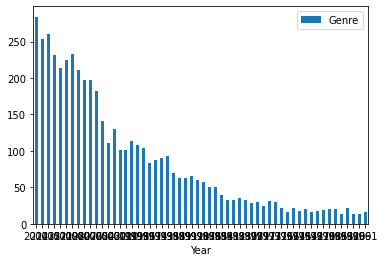

In [186]:
import math
lis = []
for m in df.genres :
    for n in m.split('|'):
        lis.append(n)
print(df.Year.value_counts().index)
df_gen = pd.DataFrame(index=lis,columns=df.Year.value_counts().index)
print(df_gen)
for m,n in df.groupby(['Year'])['genres']:
    print (m)
    for a in n :
        print (a)
        for b in a.split('|') :
            #print(type((df_gen.loc[b][m])))
            #print(df_gen[m][b][0])
            if math.isnan(df_gen[m][b][0]):
                print("we are here")
                df_gen[m][b]=1
            else :
                df_gen[m][b]=df_gen[m][b]+1
            

df_gen.dropna(how='all',inplace=True)
df_gen.to_csv('Genres_Years.csv',index=False)

df_gen

df_gen[df_gen[2014] == df_gen[2014].max()].index[0]

bes = {}
zed = pd.DataFrame(columns=['Year','Genre','    Number of Films'],index=df_gen.columns)
#print(zed)
for n in df_gen.columns:
    #print ("In ",n ,", Most Popular Genres is ", df_gen[df_gen[n] == df_gen[n].max()].index[0],"with Number of Films " ,df_gen[n].max() )
    bes[n]=df_gen[df_gen[n] == df_gen[n].max()].index[0]
    zed['Year'][n]=n
    zed['Genre'][n] = df_gen[df_gen[n] == df_gen[n].max()].index[0]
    zed['    Number of Films'][n]=df_gen[n].max() 
    
    
fes = pd.Series(bes)

#print (fes)
#zed.set_index(['Year'],inplace=True)
print(zed)
zed.plot.bar(x='Year',y='    Number of Films',rot=0,stacked=True,label='Genre')

zed.dropna(how='all',inplace=True)
zed.to_csv('max_Genres.csv',index=False)

zed

In [215]:
print(df[df['revenue']>0].revenue.count())
print(df[df['revenue']>0].revenue.value_counts())
print(df.revenue.count())
print(df.revenue.value_counts())


print(df.Year.value_counts().index)
df_rev_year = pd.DataFrame(index=df.Year.value_counts().index,columns=[0])
#print(df_rev_year)
for m,n in df.groupby(['Year'])['revenue']:
    print (m)
    print (n)
    for a in n :
        print (a)
        if math.isnan(df_rev_year[0][m]):
            print("we are here")
            df_rev_year[0][m]= a 
        else :
            df_rev_year[0][m]=df_rev_year[0][m]+a
        #print ( m , a , df_rev_year.iloc[m][0])
            #print(df_gen[m][b].isnull)
            #break

df_rev_year.dropna(how='all',inplace=True)
df_rev_year.to_csv('Genres_Years.csv',index=False)

df_rev_year




4850
12000000    10
10000000     8
11000000     7
5000000      6
6000000      6
            ..
3515061      1
12281551     1
9444018      1
68706993     1
71624879     1
Name: revenue, Length: 4701, dtype: int64
10843
0            5993
12000000       10
10000000        8
11000000        7
5000000         6
             ... 
29300000        1
32189727        1
46546197        1
106269971       1
16017403        1
Name: revenue, Length: 4702, dtype: int64
Int64Index([2014, 2013, 2015, 2012, 2011, 2009, 2008, 2010, 2007, 2006, 2005,
            2004, 2003, 2002, 2001, 2000, 1999, 1998, 1996, 1997, 1994, 1993,
            1995, 1988, 1989, 1991, 1992, 1990, 1987, 1986, 1985, 1984, 1981,
            1982, 1983, 1980, 1978, 1979, 1977, 1973, 1971, 1976, 1966, 1974,
            1975, 1964, 1972, 1967, 1970, 1968, 1965, 1963, 1962, 1960, 1969,
            1961],
           dtype='int64')
1960
10141    32000000
10142     4905000
10143    60000000
10144    25000000
10145           0
10146       

0
0
0
0
0
0
0
0
0
0
0
14250000
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1970
10648     55675257
10649     18999718
10650     81600000
10651      5200000
10652            0
10653     89800000
10654    136400000
10655            0
10656     29548291
10657            0
10658      5050000
10660    100489151
10661       900000
10662            0
10663            0
10664            0
10665     31559552
10666            0
10667            0
10668            0
10669            0
10670            0
10671            0
10672            0
10673            0
10674            0
10675      3500000
10676            0
10677            0
10678            0
10679            0
10680            0
10681            0
10682            0
10683      1500000
10684            0
10685            0
10686            0
10687            0
10688            0
Name: revenue, dtype: int64
55675257
we are here
18999718
81600000
5200000
0
89800000
136400000
0
29548291
0
5050000
100489151
900000
0
0
0
31559552
0
0
0
0
0
0
0
0
0
3500000
0

41687243
0
17000000
0
9000000
0
25000000
0
0
0
0
0
0
0
3
102000000
0
0
0
0
1978
10755    181813770
10756    187884007
10757     55000000
10758    300218018
10759     70000000
           ...    
10815            0
10816            0
10817       321952
10818            0
10819     78000000
Name: revenue, Length: 65, dtype: int64
181813770
we are here
187884007
55000000
300218018
70000000
141000000
49579269
50000000
0
41590893
0
7185518
0
0
0
35000000
30471420
0
0
0
14560084
0
11
7230000
22765081
24046533
0
0
0
0
0
0
16393000
21049053
0
0
26518355
0
3713768
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5438927
0
0
0
0
321952
0
78000000
1979
7825    104931801
7826     83471511
7827    100000000
7828    139000000
7829    210300000
7830     20045115
7831            0
7832     22490039
7833    200182160
7834     23438120
7835     39946780
7836     11988469
7837            0
7838     86432000
7839     43000000
7840     37823676
7841            0
7842     35841901
7843     30177511
7844            0
7845

505000000
201965915
61276872
119946358
35763605
0
200
57120318
157920733
0
5080409
41482207
48572000
45681173
16283667
0
52096475
153518974
0
24078196
16853487
29888235
0
221303188
39404261
14560247
0
39024251
61489265
0
0
11567449
33461269
25965144
0
8266343
16153593
9229401
11541758
0
0
103738726
48878502
1293976
0
5835247
13446769
0
27575086
15691192
46044400
1030938
0
201957688
0
0
0
2554476
11582891
20
2075084
5728953
0
0
16
1382462
47410000
0
6698361
27931461
0
0
0
0
0
0
0
205068
0
0
15645616
0
8862354
10000000
0
0
0
0
17487531
0
5765562
20423389
0
0
0
15379253
39071603
0
27734391
0
0
0
17037887
0
0
0
0
3779620
476684675
35419397
26386000
0
0
0
0
15445131
0
0
24707633
0
20710451
29381956
0
0
1991
9316    377350553
9317    520000000
9318    300854823
9319    390493908
9320     15556340
          ...    
9444            0
9445            0
9446            0
9447            0
9448      4654288
Name: revenue, Length: 133, dtype: int64
377350553
we are here
520000000
300854823
3904939

1845034188
252712101
589390539
12532777
263920180
238207122
0
333011068
225933435
39673162
162000000
109423648
26673242
139804348
79082515
67683989
121214377
257850122
224012234
245676146
41954997
125586134
152944660
136885767
12021272
178127760
164508066
126216940
172363301
181000000
0
171120329
1060056
45916769
0
159330280
28084357
0
177977226
118063304
136982834
315156409
0
64256513
314178011
50159144
131457682
299288605
43101594
3675201
10541523
0
0
0
251212670
140807547
0
25804707
43312294
60527873
50068310
36400360
6682098
0
25480490
5716080
29481428
87840042
0
501818
5684789
17626234
48169156
33956608
0
0
1179002
0
0
0
0
0
0
0
16000000
0
122417389
3263585
0
0
0
44862187
0
60000000
100000000
8038061
0
23144499
29235353
0
0
3566637
0
51376861
0
31987563
0
0
0
15738769
31611225
0
17979739
0
0
273644
0
13801755
11466088
0
0
0
9381260
1686429
0
0
0
41230799
0
0
0
4000000
0
44332015
791830
0
34673095
0
0
0
0
11838218
27354
0
0
0
0
0
0
25105255
0
0
0
0
0
26570463
74000000
0
6330054
131

13102295
0
0
0
209196298
0
16930185
773228
0
52322400
0
57588485
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
25482931
0
18902015
0
0
0
2062066
11411644
0
0
10113733
0
0
0
13308
2506446
0
33082548
0
8493890
0
0
0
0
0
0
0
0
41604473
0
605562
0
0
0
0
0
0
0
0
217201
0
0
0
1260761
146402
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1434436
2003
4949    1118888979
4950      95708457
4951     655011224
4952     180949000
4953     424988211
           ...    
5225             0
5226             0
5227             0
5228             0
5229             0
Name: revenue, Length: 281, dtype: int64
1118888979
we are here
95708457
655011224
180949000
424988211
738599701
864625978
484572835
244931766
173398518
435000000
15121165
122919055
179179718
231449203
179265204
176070171
135680000
119723856
76488889
160583018
250
121975011
220673217
62646763
44350926
131282949
456758981
273339556
156505388
28650575
90259536
212011111
0
156822020
0
195745823
74208267
245360480
98185582
0
87055349
177371441
88323487
116643346
856

0
0
0
0
426224
0
21170563
0
8059140
0
42285169
0
0
69136
0
0
11449638
0
41480851
0
4946225
0
0
0
0
0
0
0
0
0
0
0
10178331
29326868
3091922
0
0
0
0
0
0
0
1128345
13401952
0
210128
0
20138836
0
46243000
4630045
0
849055
0
0
0
0
0
163000
0
0
0
8176544
0
0
0
0
0
17807569
516139
17496992
0
22963701
834457
0
0
0
201275
0
21000000
0
0
27105095
0
11992014
0
300000
0
0
0
0
0
0
0
234360014
0
0
0
2043704
0
0
1678874
0
0
0
0
0
18948425
0
0
0
0
0
0
0
0
0
0
0
0
0
302179
0
0
21353303
3833507
0
0
0
0
0
0
0
382267
0
0
5542025
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
245000
0
0
7202
0
0
0
0
0
0
0
0
0
0
13022756
0
0
2007
7387    961000000
7388    938212738
7389    623722818
7390    442824138
7391    171600000
          ...    
7820            0
7821            0
7822            0
7823            0
7824       312751
Name: revenue, Length: 438, dtype: int64
961000000
we are here
938212738
623722818
442824138
171600000
585349010
457363168
890871626
57096190
135560026
25037897
383531464
258022233
56255142
42261

400654
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2010
1919     825500000
1920     623933331
1921    1025467110
1922     327803731
1923     954305868
           ...    
2404             0
2405             0
2406             0
2407             0
2408             0
Name: revenue, Length: 488, dtype: int64
825500000
we are here
623933331
1025467110
327803731
954305868
543513985
274470394
494878759
294804195
400062763
591794936
1063171911
293329073
35692920
74952305
415686217
96188903
278346189
335154643
310669540
252276927
232713139
215283742
0
224920315
47664559
310650585
126248813
226497209
167805466
752600867
114977104
177238796
71664962
31327899
271430189
157107755
152263880
154026136
0
698491347
321885765
318502923
170432927
0
97009150
159291809
414211549
102820008
20348249
18409891
7644937
261930431
0
204594016
12355734
136000000
29922472
94882889
237382724
77477008
48190704
49830607
2995811
216485654
36993168
0
136150434
357852395
211780824
3453043
52615806
60222298
6491240
51148651
115664037
235

76586316
35485608
246984278
362000072
585178928
43058898
122915111
82394288
95000000
71009334
205366737
63464861
21819348
1456675
1600000
197687603
62616646
9489829
7847000
51164106
126041322
151831537
46216641
243843127
0
158674180
112544580
29000000
44030246
89289910
105200903
173965010
0
12077441
0
6108720
47241945
6854611
24261569
173649015
0
491868548
282570682
8352885
86175291
0
5750401
63327201
4861022
20275812
146497771
0
57284237
18000000
0
115922175
32438988
48065672
74597643
44907260
16505460
0
15008161
97594140
0
0
7800000
19145732
3639345
15600000
248384621
0
97505481
1021398
0
0
28234657
60141683
10337387
63372757
16971
0
19255873
27437881
21587700
0
0
318982
22309223
19701164
343341
0
0
126546518
0
0
74918
9747
60052138
5496951
347434178
5867686
95020213
1585582
0
23198652
8555008
6399
2415472
415440673
42930462
110000000
17654912
0
78378744
2681345
64065
0
102617
2054941
22456509
523511
0
0
74188937
4069826
0
0
0
21833
3346257
1162635
0
0
0
11650
11176469
0
175705
86362

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1301696
0
0
0
44695
0
0
0
0
187674
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
13684
0
0
0
0
0
732655
0
0
0
0


,0
2014,24331150183
2013,24703633017
2015,26762450518
2012,24668428824
2011,23695591578
2009,22180170559
2008,19431695138
2010,21959998545
2007,19411668670
2006,16275739385


In [216]:
df_rev_year = df_rev_year[0]/1000000

In [219]:
df_rev_year.to_csv('Revenue_Years.csv',index=False)

Int64Index([2014, 2013, 2015, 2012, 2011, 2009, 2008, 2010, 2007, 2006, 2005,
            2004, 2003, 2002, 2001, 2000, 1999, 1998, 1996, 1997, 1994, 1993,
            1995, 1988, 1989, 1991, 1992, 1990, 1987, 1986, 1985, 1984, 1981,
            1982, 1983, 1980, 1978, 1979, 1977, 1973, 1971, 1976, 1966, 1974,
            1975, 1964, 1972, 1967, 1970, 1968, 1965, 1963, 1962, 1960, 1969,
            1961],
           dtype='int64')
                2014 2013 2015 2012 2011 2009 2008 2010 2007 2006  ... 1972  \
Adventure        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Fantasy          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Romance          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Science Fiction  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Horror           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
War              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Crime       

Drama
Science Fiction
Drama
Comedy
Animation|Comedy
1970
Animation|Comedy|Family|Adventure
we are here
we are here
we are here
we are here
Adventure|Science Fiction|Mystery
we are here
we are here
Comedy|Drama|War
we are here
we are here
Action|Adventure|Comedy|Drama|War
we are here
Horror
we are here
Drama|History|War
we are here
Drama|Romance
we are here
Drama|Romance
History|Action|Drama|Adventure|War
Comedy|Drama|Thriller
we are here
Western
we are here
Action|Drama|Thriller
Drama|Romance
Horror|Crime
we are here
TV Movie|Animation|Family|Fantasy
we are here
we are here
War|Comedy|Drama
Action|Comedy|Drama|Western
Science Fiction|Thriller
Action|Drama|Romance|Western
Comedy
Fantasy|Drama|Family
Horror
Music|Drama|Crime
we are here
Drama
Horror
Documentary|Music
we are here
Action|Comedy|Western
Comedy
Action|Adventure|Drama|Western
Documentary|Music
Action|Western
Documentary|Music
Action|Western
Romance|Drama|Comedy
Adventure|Comedy|Crime|Mystery|Romance
Action|Drama|Foreign|Histo

we are here
Action|Crime|Drama|Thriller
Comedy
Drama|Romance
we are here
Action|Adventure|Drama
Drama|Action|Thriller|Crime
Adventure|Comedy|Family|Science Fiction|TV Movie
we are here
Drama|History
we are here
Drama|Crime
Drama|Animation|Adventure
we are here
Drama|Action|Thriller|Science Fiction
Comedy|Mystery|Thriller
we are here
Thriller|Mystery|Drama
Mystery
Crime|Drama|Thriller
Drama|Action
Action|Adventure|War|Thriller
Action|Comedy|Drama
Horror|Thriller|Science Fiction|Mystery
Horror
Action|Thriller|War
Fantasy|Science Fiction
Horror
Action|Adventure|Comedy|Romance
Drama
Adventure|Fantasy|Science Fiction|Family
Adventure|Family|Fantasy|Music|Science Fiction
Drama|Horror|Thriller
Comedy|Family
Action|Drama|Horror|Thriller
Documentary|Horror
we are here
Adventure|Animation|Drama
Comedy|Western
we are here
Science Fiction|Adventure
Action|Drama|Horror|Science Fiction
Drama|Crime
Fantasy|Drama|Comedy|Romance
Horror|Science Fiction|Thriller
Drama
Drama|Horror|Science Fiction|Thrille

we are here
Horror
we are here
Comedy
Drama|Comedy
Comedy|Romance
Action|Crime|Thriller
Comedy|Romance
Drama|History
we are here
Action|Drama|Romance|Thriller
Comedy|Adventure
Family|Animation
we are here
Comedy
Horror|Thriller|Romance
Mystery|Drama|Horror|Thriller
we are here
Crime|Drama
Comedy
War|Drama
we are here
Comedy|Romance|Science Fiction
Science Fiction|Drama
Horror|Thriller
Music|Drama|Romance
we are here
Science Fiction|Action|Thriller|Crime|Drama
Thriller|Horror|Science Fiction
Comedy|Romance
Romance|Drama
Comedy
Thriller|Crime|Drama
Comedy
Drama|Music|Romance
Drama|Thriller
Comedy
Action|Comedy|Crime
Horror|Thriller
Drama|Fantasy|Horror|Science Fiction|Thriller
Comedy
Drama|Comedy|Romance
Fantasy|Action|Adventure
Action|Adventure|Crime|Drama|Romance
Drama|Action|Music|Romance
Action|Thriller|Drama|Western|Crime
we are here
Comedy|Drama
Horror|Mystery|Thriller
Comedy
Drama|Science Fiction|Action|Adventure
Horror|Mystery|Science Fiction
Fantasy|Comedy|Science Fiction|Romanc

Comedy|Drama|Romance
Crime|Thriller|Action
Animation|Family
Comedy|Horror
Science Fiction
Comedy
Horror|Comedy|Science Fiction
Thriller|Action|Comedy|Crime
Science Fiction|Thriller
Drama|Family
Crime|Drama
Drama|Comedy|Romance|Family
Horror
Drama
Action|Thriller|War
Comedy|Crime|Drama|Romance|Thriller
Action|Thriller
Action|Crime|Thriller
Fantasy|Horror
Drama|History
Drama|Family|Fantasy|Science Fiction
Adventure|Drama
Comedy|Horror|Science Fiction
Horror|Science Fiction
Action|Comedy|Crime
Comedy|Horror|Music
Drama|Romance
Animation|Family
Comedy|Drama|Romance
Comedy|Drama
Comedy|Drama|Romance
Drama|Romance
Comedy|Romance
Science Fiction
Animation|Comedy|Drama|War
Drama|Romance|Comedy
Family|Adventure
Action|Drama|Horror|Science Fiction|Thriller
Fantasy|Drama|Music|Romance
Drama|Fantasy|Horror
Comedy|Horror
Crime|Horror|Thriller
Horror|Science Fiction|Thriller
Drama|Romance|History
Comedy
1987
Science Fiction|Action|Adventure|Thriller
we are here
we are here
we are here
we are here
Dr

Drama
Action|Horror|Thriller|Science Fiction
Fantasy|Drama|Comedy|Science Fiction|Family
Action|Comedy|Romance
Animation|Family
Fantasy|Comedy|Science Fiction|Romance
Comedy|Horror|Action|Science Fiction
Crime|Drama
Horror
War|Drama|History|Action|Romance
Documentary|History
we are here
Action|Adventure|Science Fiction
Action|Adventure|Crime|Drama|Thriller
Comedy|Romance
Crime|Drama|Comedy
Horror|Science Fiction
Action|Comedy
Horror|Thriller
Comedy|Drama|Romance
Fantasy|Comedy|Science Fiction|Romance
Adventure|Drama|Action|Thriller
Comedy|Music
Comedy
Science Fiction|Action
Drama
Adventure|Comedy|Family
Mystery|Drama|Science Fiction|Thriller
Drama|Family|Fantasy
Adventure|Fantasy|Comedy
Action|Thriller
Comedy|Crime|Mystery
Action|Crime|Drama|Thriller
Crime|Drama|Romance|Thriller
Action|Comedy|Mystery|Thriller
Horror|Mystery
Drama
Comedy|Romance
Comedy
Horror
Comedy|Horror|Science Fiction
Drama|Romance
Crime|Drama
Adventure|Comedy|Drama|Family|Romance
Music
Comedy
Comedy|Romance
Drama|H

Crime|Drama|Romance
Comedy|Romance
Thriller|Comedy|Horror|Science Fiction
Drama|Romance|Crime
Comedy|Horror|Mystery|Thriller
Fantasy|Thriller|Horror
Drama|Comedy|Romance
Adventure|Action|Family|Comedy
Thriller|Action|Horror|Science Fiction|Crime
Crime|Drama|Mystery
Comedy|Drama|Romance
Action|Comedy|Romance|Thriller
Mystery|Thriller
Action|Crime|Drama|Mystery|Thriller
Animation|Family
Action|Thriller|Crime
Drama|Music|Family
Action|Comedy|Drama
Drama|Music
Drama|Horror|Thriller|Crime
Action|Adventure|Crime|Thriller
Romance|Comedy|Drama
Science Fiction|Thriller
Action|Comedy|Crime
Comedy|Horror|Thriller|Crime
Drama
Action|Adventure|Drama|Family
Drama|Romance
Action|Comedy|Thriller|Crime|Romance
Crime|History
Comedy|Drama|Foreign|Romance
Drama
Action|Fantasy
Comedy|Foreign
Comedy|Drama|Romance
Comedy|Family
Comedy|Fantasy
Comedy
Drama|Romance|Thriller
Drama|Music|Romance
Adventure|Comedy|Family|Science Fiction
Comedy|Science Fiction
1993
Romance|Fantasy|Drama|Comedy
we are here
we are he

1995
Crime|Mystery|Thriller
we are here
we are here
we are here
Animation|Comedy|Family
we are here
we are here
we are here
Drama|Crime|Thriller
we are here
Action|Drama|History|War
we are here
we are here
we are here
Adventure|Action|Thriller
we are here
Adventure|Fantasy|Family
we are here
Action|Thriller
Science Fiction|Horror|Action
we are here
we are here
Science Fiction|Thriller|Mystery
Drama
Adventure|Drama|Action|Comedy|Thriller
Adventure|Animation|Drama|Family
Action|Crime|Drama|Thriller
Drama|Romance
we are here
Science Fiction
Science Fiction|Fantasy|Action|Crime
Drama|Crime
Drama|Comedy|Romance
Fantasy|Drama|Comedy|Family
Fantasy|Comedy|Family
Comedy|Family|Romance
Comedy
Adventure|Action
Romance|Animation|Family|Comedy|Adventure
Comedy
Drama|Romance
Drama|Romance
Crime|Drama|Mystery|Thriller|Action
Family|Animation|Comedy
Adventure|Action|Drama|Science Fiction|Thriller
Thriller|Action|Crime
Comedy|Drama|Romance
Action|Drama|Science Fiction|Thriller
Fantasy|Drama|Comedy|Thr

Action|Drama|Mystery|Thriller
Action|Thriller
Adventure|Comedy|Family|Romance
Comedy|Drama
Comedy|Romance
Drama|Action|Thriller
History|Drama|Adventure|War
we are here
we are here
Comedy|Romance
Drama
Drama|Thriller|Mystery
Action|Drama|Thriller
Adventure|Comedy|Family|Science Fiction|Action
Action|Crime
Family|Animation|Music
we are here
Comedy
Crime|Thriller|Drama
Comedy|Romance
Action|Drama|Mystery|Thriller|Crime
Adventure|Action|Drama|Thriller
Drama|Mystery|Thriller|Crime
Crime|Drama|Thriller
Comedy
Thriller
Family|Animation|Adventure
Fantasy|Horror|Thriller
Drama|Thriller
Drama|Comedy|Romance
Action|Adventure|Fantasy|Horror|Science Fiction
Action|Thriller
Thriller|Science Fiction|Mystery
Drama
Drama|Adventure
Action|Drama
Horror|Thriller|Mystery
Comedy|Family
Drama|History
Action|Drama|Horror|Mystery|Thriller
Fantasy|Drama|Comedy|Thriller|Science Fiction
Comedy
Comedy|Drama
Animation|Family
Crime|Drama
Fantasy|Adventure|Comedy|Family
Comedy|Family
Action|Adventure|Crime|Thriller
A

Drama|Thriller|Crime
Drama|Fantasy
Drama|Comedy|Crime|Romance
Drama|Romance
Action|Thriller|Science Fiction|Horror
Drama
Thriller|Action|Comedy|Crime
Horror|Thriller|Science Fiction
Drama|Thriller|Mystery
Drama
Drama
Comedy|Romance
Action|Crime|Mystery|Thriller
Drama|History|Romance
we are here
Drama|History|Thriller
Comedy|Action|Crime|Adventure
Action|Science Fiction
Comedy|Crime|Romance
Fantasy|Horror
Comedy|Romance|Science Fiction
Drama|History
Comedy|Drama
Western|Horror|Thriller
we are here
Action|Comedy|Thriller
Drama|History
Comedy|Crime|Drama
Drama|Comedy|Romance
Drama|Science Fiction|Thriller
Comedy|Drama|Family|Science Fiction
Fantasy|Drama|Comedy|Romance
Drama|Action|Thriller|Crime|Mystery
Drama
Comedy|Drama|Romance
Drama|Comedy|Romance|Family
Science Fiction|Action
Adventure|Fantasy|Animation|Science Fiction|Mystery
Fantasy|Comedy|Science Fiction|Family
Drama
Drama|Comedy|Romance
Action|Comedy|Thriller
Comedy|Drama|History
Comedy
TV Movie|Action|Drama|Western
we are here
T

Animation|Family
Drama|Science Fiction
Comedy|Romance
Comedy|Drama
Thriller
Horror|Thriller
Adventure|Comedy
Drama|Thriller|Crime
Animation|Family|Comedy
Drama|Romance|Thriller
Drama
Drama|Romance
Drama|Mystery
Comedy|Drama
Drama|Thriller
Action|Crime|Thriller
Drama|Romance|Thriller
Comedy|Romance
Action|Comedy|Science Fiction
Comedy|Romance
Crime|Comedy|Romance
Drama
Action|Drama|War
Horror|Mystery
Action|Crime|Thriller
Drama|Romance
Mystery|Adventure|Comedy|Romance|Drama
Adventure|Animation|Family
Action|Crime|Thriller
Drama|Thriller
Drama|Romance
Comedy
Fantasy|Comedy|Science Fiction|Romance
Comedy|Romance
Comedy|Drama
Drama|Romance
Action|Adventure|Comedy|Thriller|Crime
Drama|Fantasy
Drama
Horror
Action|Comedy
Drama|Romance
Action|Horror|Science Fiction
Comedy|Romance|Crime
Comedy|Crime|Mystery|Romance|Thriller
Comedy|Drama|Romance
Horror|Science Fiction|Thriller
Adventure|Animation|Action|Comedy|Family
Crime|Drama
Action|Science Fiction|Thriller
Drama|Comedy|War|Crime|Thriller
Com

Thriller|Horror|Mystery
Crime|Drama|Horror
Action|Thriller|Crime|Foreign
Crime|Drama
Documentary|Foreign
Drama|Foreign
Family
Drama|Thriller
War|Drama
Documentary|Foreign
Mystery|Drama
Comedy|Drama|Fantasy
Fantasy|Drama|Science Fiction|Romance|Family
Comedy|Drama
Drama|Foreign
Drama|Thriller
Horror|Thriller|Action
Comedy|Romance
Action|Comedy|Drama
Comedy
Comedy|Romance
Documentary
Comedy|Family
Crime|Drama
Action|Crime|Drama|Romance
Action|Adventure|Animation|Fantasy
Comedy|Drama
Animation|Comedy
Action|Adventure|Animation|Comedy|Family
Horror
Action|Drama|Foreign
Comedy|Documentary
Documentary
Documentary
2003
Adventure|Fantasy|Action
we are here
we are here
we are here
Fantasy|Action|Thriller
we are here
Adventure|Fantasy|Action
Action|Crime
we are here
Adventure|Action|Thriller|Science Fiction
we are here
Adventure|Action|Thriller|Science Fiction
Animation|Family
we are here
we are here
Fantasy|Comedy
we are here
Comedy|Romance|Drama
we are here
we are here
Romance|Comedy|Family|Fa

Western|History|War
we are here
Drama|Romance
Horror|Thriller|Mystery
Action|Adventure|Crime|Thriller
Drama|Thriller|Mystery
Thriller|Drama
Comedy|Drama|Horror
Thriller|Action|Comedy|Crime
Comedy
Drama|Action|Thriller
Drama|Romance|Comedy
Comedy|Romance
Action|Comedy|Science Fiction
Science Fiction|Drama|Thriller
Animation|Action|Science Fiction
Western|Animation|Family|Comedy|Music
Western|Adventure
Comedy|Romance
Documentary
we are here
Comedy|Romance
Comedy
Drama|History|War
Crime|Drama|Mystery
Adventure|Drama|Action|Thriller
Action|Adventure|Crime|Drama|Thriller
Adventure|Animation|Comedy|Family
Drama|Thriller
War|Drama|Mystery|Romance
Music|Adventure|Animation|Action|Comedy
Action|Comedy|Horror|Western
Animation|Family
Comedy
Drama|Action|Science Fiction
Comedy|Science Fiction
Comedy|Drama|Romance
Action|Adventure|Comedy|Thriller
Comedy|Drama|Family
Comedy|Crime
Adventure|Fantasy|Drama|Science Fiction|Family
Music|Comedy|Family|Romance
Drama|Mystery|Thriller
Comedy|Thriller|Crime


Horror|Thriller
Comedy|Drama|Romance
Fantasy|Animation|Comedy|Science Fiction|Family
Thriller|Drama|Mystery|Crime
Drama|Romance
Action|Adventure|Drama|Thriller
Documentary|Music
Drama|Foreign|Horror|Mystery|Thriller
Horror
Drama|Horror|Thriller
Drama|History
Comedy|Drama|Romance
Horror
Action|Adventure|Comedy|Crime|Drama
Drama
Horror|Thriller|Fantasy
Drama|Romance|Foreign
Adventure|Drama|Family
Comedy|Drama
Comedy|Horror
Drama|Comedy
Comedy|Crime|Drama
Comedy
Comedy|Drama
Crime|Drama|Thriller
Thriller|Comedy|Horror
Comedy|Drama|Romance
Comedy|Horror|Science Fiction
Comedy|Foreign|Romance
Comedy|Documentary|Music
Comedy
Drama|Family
Drama
Horror|Mystery|Thriller
Comedy|Crime|Drama
Documentary|Drama
Drama
Action|Adventure|Fantasy
Action|Adventure|Animation|Drama|Family
Comedy|Drama
Comedy|Music
Drama
Comedy
Animation|Fantasy
Comedy|Action
Drama|Foreign|Romance
Documentary|Drama|History
Comedy
Horror|Science Fiction|Thriller
Science Fiction
Comedy|Horror
Action
Action|Documentary|Science 

Horror|Thriller
Documentary
Music
TV Movie|Family|Comedy|Adventure|Crime
Action|Adventure|Drama|Thriller
Action|Comedy
Comedy
Drama|Thriller
Documentary
Drama|Family
Comedy|Drama|Family|Music|TV Movie
Drama|Thriller|Crime|Mystery
Drama
Drama|Thriller
Drama|Romance
Documentary
Comedy|Drama
Comedy|Romance
Comedy
Drama
Drama|Comedy|Romance
Animation|Action
Action|Comedy
Drama|Horror|Thriller
Drama|Comedy|Foreign
Comedy
Horror
Comedy
Family
Comedy|Drama|Family|TV Movie
Drama|Action|Thriller
Documentary
Drama
Comedy|Drama|Romance
Crime|Drama|Thriller
Comedy
Comedy
Drama|Horror|Mystery|Thriller
Horror|Thriller
Drama|Fantasy|Science Fiction
Horror|Thriller
Comedy
Action|Crime|Drama|Music|Thriller
Comedy
Drama|Action|Foreign
Drama|Romance
Drama|Fantasy|Horror|Thriller|Mystery
Crime|Drama|Thriller
Documentary
Drama
Comedy|Drama|Family
Action|Thriller
Comedy
2007
Adventure|Fantasy|Action
we are here
we are here
we are here
Adventure|Fantasy|Family|Mystery
we are here
we are here
Animation|Comedy

Comedy|Romance
Comedy
Drama|Action
Action|Comedy
Drama|Romance
Fantasy|Comedy|Family|Romance
Action|Crime
Action
Horror|Thriller|Mystery
we are here
Drama|Action|Thriller|Crime
Comedy
Action|Comedy|Thriller
Comedy
Fantasy|Action|Adventure
Drama
Comedy|Drama|Family|Music|Romance
Drama|Romance
Action|Adventure|Science Fiction|Thriller
Drama|Romance
Comedy|Drama|Crime
Crime|Drama|Mystery
Adventure|Family|Fantasy
Comedy|Adventure
Comedy|Romance
Comedy|Drama|Family
Crime|Action|Drama
Family
Animation|Comedy|Family
Action|Crime|Drama|Thriller
Comedy|Drama|Music|Romance
Comedy|Romance|Drama
Music
Adventure|Science Fiction
Romance|Comedy
Animation|Family
Thriller|Animation|Action|Science Fiction|Adventure
Horror|Thriller|Crime
Comedy|Romance
Family|Action|Science Fiction
Drama|Romance
Animation|Comedy|Family|Adventure|Fantasy
Drama|History|Romance
Drama|Comedy
Action|Adventure|Fantasy
Drama|History|War
Animation|Family
Action|Adventure|Crime|Drama|Thriller
Thriller|Crime|Mystery
Drama|Action|T

Comedy|Drama|Romance
Drama|Mystery|Thriller
Fantasy|Drama|Action|Thriller|Animation
Comedy|Drama
Crime|Drama|Thriller
Thriller
Comedy
Animation|Action|Adventure
Horror
Comedy|Drama
Thriller|Drama|Crime|Mystery
Adventure|Drama|Family
Action|Adventure|Animation|Science Fiction
Drama|Romance
Adventure|Thriller|Science Fiction
Action|Drama|History
Action|Crime|Drama|Thriller
Adventure
Comedy
Comedy
Mystery|Animation|Comedy|Fantasy
Drama|Action|Comedy|Crime
Fantasy
Comedy
Drama|Music|Romance
Thriller|Crime|Drama|Mystery
Drama|History
Horror|Thriller|Mystery
Action|Adventure|Comedy
Drama|Comedy|Romance
Comedy|Romance
Drama
Drama|Foreign|Romance
Action|Drama|Crime|Thriller
Documentary
Drama
Science Fiction|Animation|Comedy
Horror
Drama|Romance
Drama
Crime|Thriller|Horror|Drama
Drama|Romance
Science Fiction|Adventure|Animation|Action|Family
Thriller|Crime|Drama|Action
Action|Science Fiction|Thriller
Action|Drama|Foreign|Thriller
Drama|Action|Thriller
Comedy|Romance
Action|Adventure|Science Fic

Horror|Comedy
Documentary
we are here
Action|Comedy|Thriller|Romance
Horror
Drama|Thriller
Comedy|Drama|Romance
Comedy|Romance
Fantasy|Comedy
Science Fiction|Comedy|Adventure
Thriller|Drama
Drama|Horror|Mystery
Comedy|Drama|Romance
Animation|Adventure|Family|Fantasy
Action|Crime|Drama|Thriller
Drama|Romance
Drama
Comedy|Drama|Romance
Crime|Drama|Action|Thriller
Drama|History|War
Horror|Thriller
Drama|Romance|Science Fiction
Action|Animation
Crime|Drama|Thriller
Animation|Family
Action|Comedy|Crime
Crime|Drama|Horror|Thriller
Drama|Thriller|Science Fiction
Adventure|Comedy|Drama
Comedy|Romance|Drama
Drama|Action|Thriller
Drama|Romance|Comedy
Animation|Comedy|Family
Drama|Comedy|Romance
Horror|Mystery|Thriller
Drama
Comedy|Family
Thriller|Crime|Horror
Comedy|Horror
Comedy|Drama|Romance
Drama
Fantasy|Action|Family
Horror|Drama|Thriller
Comedy|Family|Fantasy
Romance|Comedy
Drama|Thriller
Horror|Thriller
Animation|Action|Science Fiction
Drama|Thriller|Mystery
Comedy
Fantasy|Comedy|Romance
A

Action|Drama|Thriller
Drama
Drama|Thriller
Thriller|Drama|Horror
Action|Adventure|Animation|Family|Fantasy
Drama|Thriller|Mystery
Action|Crime|Comedy
Comedy|Drama|Romance
Adventure|Fantasy|Action
Comedy|Family|Romance
Crime|Adventure|Action|Comedy|Thriller
Drama|Thriller|Science Fiction
Animation|Comedy|Adventure
Comedy
Drama|Fantasy|Romance
Comedy
Horror|Science Fiction|Mystery|Thriller
Action|Comedy
Comedy|Romance
Adventure|Fantasy|Action|Comedy
Animation|Action|Adventure
Drama|Documentary
we are here
Animation|Family
Drama|Music|Comedy
we are here
Horror|Thriller|Science Fiction
Horror|Comedy
Music|Family|Animation|Comedy
Horror|Mystery
Adventure|Animation|Family
Action|Comedy|Science Fiction
Family|Comedy
Animation|Family
Drama
Science Fiction|Thriller
Comedy|Fantasy|Family|Music|Animation
Drama
Thriller
Drama|Comedy
Animation|Family|Adventure|Comedy|Fantasy
Drama|Science Fiction|Romance
Action|Thriller|Adventure
Thriller|Crime
Drama|Mystery
Comedy
Drama|Romance
Drama|Comedy|Romanc

Action|Drama|Crime
Drama|Comedy|Romance
Drama
Action|Thriller|Crime
Comedy|Crime|Thriller
Adventure|Drama|Romance
Drama
Horror|Thriller
Horror|Crime|Mystery|Thriller
Drama|Thriller
Drama
Horror|Thriller|Comedy
Drama
Horror|Thriller
Thriller|Horror|Mystery
Crime|Thriller
Action|Thriller
Animation
Drama|Thriller
Thriller|Crime|Drama
Comedy
Drama|Romance
War|Action|Thriller|Science Fiction
Thriller
Comedy
Drama|Comedy|Romance
Drama|Thriller|Crime
Drama|Romance
Action
Comedy
Comedy|Crime|Family
Drama|Fantasy|Thriller
Drama|Comedy
Drama|Adventure|Romance
Thriller|Drama|Crime|Mystery
Action|Comedy|Crime
Drama|Romance
Romance|Comedy
Horror|Thriller
Drama
Comedy|Drama
Horror|Thriller
Action|Thriller|Crime|Mystery
Action|Comedy|Thriller|Crime|Romance
Drama|Comedy|Romance
Drama|Comedy
Fantasy|Drama|Comedy|Family
Comedy|Romance|Fantasy|Drama
Thriller|Horror
Family|Animation|Adventure|Comedy
Drama
Comedy|Family
Drama|Romance
Drama|Romance
Action|Fantasy|Adventure
Drama
Drama|Action|Adventure|Histo

Action|Adventure|Romance|Science Fiction|Thriller
Drama|Thriller|Mystery|Action
Drama
Horror
Action|Science Fiction|Horror
Adventure|Drama|History
Comedy|Drama|Romance
Drama|Thriller
Drama
Comedy
Comedy
Animation|Comedy|Adventure|Family|Science Fiction
Comedy
Drama
Animation|Action|Adventure|Family
Action|Crime|Thriller
Romance
Science Fiction|Thriller
War
Comedy
Drama|Crime
Action|Drama
Drama|Romance
Animation|Family|Comedy
Crime|Drama|Thriller
Comedy|Drama
Drama|Romance
Science Fiction|Thriller|Horror
Thriller
Comedy|Romance
Comedy|Horror
Drama|Thriller|Crime
Thriller|Crime|Drama
Crime|Drama|Thriller
Comedy
Drama|Romance|Crime|Mystery
Comedy
Drama
Thriller|Drama
Drama
Drama
Drama|History
Thriller|Crime|Drama
Romance|Drama
Science Fiction|Thriller
Thriller
Animation|Family|Adventure
Animation|Family
Mystery|Thriller
Horror|Thriller
Action|Adventure|Crime
Fantasy|Drama|Romance
Thriller|Crime
Fantasy|Family|Comedy|Animation
Drama|Romance
Drama
Drama
Comedy|Drama
Comedy|Drama
Drama|Thril

Action|Crime|Drama|Thriller
Drama|Thriller
Thriller|Drama
Animation|Comedy|Family|Adventure
Thriller|Action|Drama
Thriller|Action|Crime
Action|Adventure
Crime|Drama|Thriller
Music|Drama
Comedy|Romance
Drama
Drama|Comedy
Comedy|Drama
Drama
Drama|Comedy
Science Fiction|TV Movie
we are here
Drama|Romance|Comedy
Thriller|Science Fiction|Drama
Comedy|Drama|Crime
Adventure|Drama|Comedy
Drama
Documentary
we are here
Thriller|Animation|Action|Crime
Comedy|Drama|Romance
Animation
Drama|Fantasy|Science Fiction
Horror|Comedy|Thriller
Thriller
Drama
Thriller|Drama|Action|Mystery
Animation|Family
Romance|Comedy|Animation|Drama|Family
Drama
Drama|Thriller
Thriller
Romance|Drama
Drama
Drama|Comedy|Romance
Drama|Romance|Science Fiction
Action
Comedy
Thriller|Drama
Horror
Action|Crime|Thriller
Thriller
Drama|Comedy
Drama|Music
Horror
Thriller|Crime|Horror
Drama
Thriller|Crime|Drama|Mystery
Drama
Thriller|Science Fiction
Comedy
Comedy|Horror
Thriller
Horror
Drama
Drama|Comedy|Science Fiction
Drama|Thril

Crime|Action|Thriller
Science Fiction|Action|Adventure
Romance|Fantasy|Family|Drama
we are here
War|Adventure|Science Fiction
we are here
Action|Family|Science Fiction|Adventure|Mystery
Action|Drama
Action|Drama|Thriller
Drama|Romance
Comedy|Drama
Action
Comedy
Crime|Comedy|Action|Adventure
Drama|Thriller|History
we are here
Action|Science Fiction|Thriller
Mystery|Drama
Crime|Action|Science Fiction
Comedy|Music
we are here
Thriller|Drama
Adventure|Horror|Comedy
we are here
Drama|Thriller
Crime|Drama|Mystery
Adventure|Animation|Comedy|Family|Fantasy
Action|Crime|Drama|Mystery|Thriller
Drama|Romance
Drama|Music
Fantasy|Action|Adventure
History|Drama
Comedy|Action|Adventure
Fantasy|Drama|Romance
Action|Adventure|Science Fiction
Fantasy|Comedy|Animation|Science Fiction|Family
Drama|Mystery|Romance
Thriller|Crime|Drama
Thriller|Comedy|Drama|Romance|Science Fiction
Romance|Drama
Comedy
Adventure|Drama
Comedy|Drama
Action|Crime|Thriller
Drama
Science Fiction|Mystery|Thriller
Comedy|Adventure


Documentary
Drama|History|Thriller|Science Fiction
Horror|Documentary
Comedy|Drama
Thriller|Horror
Drama|Thriller
Action|Adventure|Science Fiction
Romance|Comedy|Drama
Drama|Comedy
Documentary
Drama
Fantasy|Adventure|Comedy
Romance|Comedy|Drama|Mystery
Documentary
Romance|TV Movie
Horror
Drama
Mystery|Horror|Thriller
Comedy
Thriller
Drama
Documentary
Documentary
Thriller|Mystery|Drama|Horror
Documentary
Music|Drama|Documentary|Crime
Mystery|Drama
Comedy|Horror
Horror|Thriller
Comedy
Drama|Romance|Comedy
Documentary
Horror
Drama
Documentary|Science Fiction
Thriller|Drama
Thriller|Documentary
Documentary
Horror
Drama|Science Fiction|Comedy
Documentary
Thriller|Drama|Action|Crime
Comedy|Romance
Family|Action|Drama
Horror
Thriller|TV Movie|Science Fiction|Drama
Thriller|Mystery|Horror|Fantasy
Comedy|Drama|Romance
Mystery|Drama|History|Family|Thriller
Horror
Music|Documentary
Horror|Thriller
Animation|Comedy|Family
Comedy
Crime|Thriller|Action|Horror
Drama|Horror
Drama
Thriller|Adventure|Dr

,Year,Genre,Number of Films
2014,2014,Drama,284
2013,2013,Drama,253
2015,2015,Drama,260
2012,2012,Drama,232
2011,2011,Drama,214
2009,2009,Drama,224
2008,2008,Drama,233
2010,2010,Drama,211
2007,2007,Drama,197
2006,2006,Drama,197


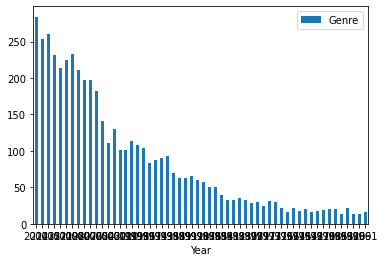

In [259]:
import math
lis = []
for m in df.genres :
    for n in m.split('|'):
        lis.append(n)
print(df.Year.value_counts().index)
df_gen = pd.DataFrame(index=set(lis),columns=df.Year.value_counts().index)
print(df_gen)
for m,n in df.groupby(['Year'])['genres']:
    print (m)
    for a in n :
        print (a)
        for b in a.split('|') :
            #print(type((df_gen.loc[b][m])))
            #print(df_gen[m][b][0])
            if math.isnan(df_gen[m][b]):
                print("we are here")
                df_gen[m][b]=1
            else :
                df_gen[m][b]=df_gen[m][b]+1
            

df_gen.dropna(how='all',inplace=True)
df_gen.to_csv('Genres_Years.csv',index=False)

df_gen

df_gen[df_gen[2014] == df_gen[2014].max()].index[0]

bes = {}
zed = pd.DataFrame(columns=['Year','Genre','    Number of Films'],index=df_gen.columns)
#print(zed)
for n in df_gen.columns:
    #print ("In ",n ,", Most Popular Genres is ", df_gen[df_gen[n] == df_gen[n].max()].index[0],"with Number of Films " ,df_gen[n].max() )
    bes[n]=df_gen[df_gen[n] == df_gen[n].max()].index[0]
    zed['Year'][n]=n
    zed['Genre'][n] = df_gen[df_gen[n] == df_gen[n].max()].index[0]
    zed['    Number of Films'][n]=df_gen[n].max() 
    
    
fes = pd.Series(bes)

#print (fes)
#zed.set_index(['Year'],inplace=True)
print(zed)
zed.plot.bar(x='Year',y='    Number of Films',rot=0,stacked=True,label='Genre')

zed.dropna(how='all',inplace=True)
zed.to_csv('max_Genres.csv',index=False)

zed

In [101]:
las=[]
for n in range (2):
    las.append(n)
df_year = pd.DataFrame(columns=lis)
df_year

,2014,2013,2015,2012,2011,2009,2008,2010,2007,2006,...,1967,1972,1970,1968,1965,1963,1960,1962,1969,1961


In [ ]:
for m in range(0,10843):
    s2 = pd.Series([df.iloc[m]['original_title']])
    print("!!!!")
    print(s2)
                #s1 = s1.append(s2,ignore_index=True)
    df_year[df.iloc[m]['Date'].year] += df_year[df.iloc[m]['Date'].year].append(s2,ignore_index=True)
    print("####")
    print(df_year[df.iloc[m]['Date'].year])
    print("@@@@")

    

!!!!
0    Jurassic World
dtype: object
####
0    Jurassic WorldJurassic World
Name: 2015, dtype: object
@@@@
!!!!
0    Mad Max: Fury Road
dtype: object
####
0    Jurassic WorldJurassic WorldJurassic WorldJura...
Name: 2015, dtype: object
@@@@
!!!!
0    Insurgent
dtype: object
####
0    Jurassic WorldJurassic WorldJurassic WorldJura...
Name: 2015, dtype: object
@@@@
!!!!
0    Star Wars: The Force Awakens
dtype: object
####
0    Jurassic WorldJurassic WorldJurassic WorldJura...
Name: 2015, dtype: object
@@@@
!!!!
0    Furious 7
dtype: object
####
0    Jurassic WorldJurassic WorldJurassic WorldJura...
Name: 2015, dtype: object
@@@@
!!!!
0    The Revenant
dtype: object
####
0    Jurassic WorldJurassic WorldJurassic WorldJura...
Name: 2015, dtype: object
@@@@
!!!!
0    Terminator Genisys
dtype: object
####
0    Jurassic WorldJurassic WorldJurassic WorldJura...
Name: 2015, dtype: object
@@@@
!!!!
0    The Martian
dtype: object
####
0    Jurassic WorldJurassic WorldJurassic WorldJura...
Name:

In [222]:
df_gen

,2014,2013,2015,2012,2011,2009,2008,2010,2007,2006,...,1972,1967,1970,1968,1965,1963,1962,1960,1969,1961
Action,129,121,107,99,115,108,99,108,95,80,...,10,7,11,6,9,4,8,8,10,7
Adventure,67,67,69,50,62,72,63,59,60,55,...,5,7,6,5,6,7,7,5,5,6
Science Fiction,62,61,86,54,56,71,52,46,41,30,...,4,4,3,4,2,2,2,3,3,4
Thriller,179,175,171,160,146,157,127,135,125,114,...,10,5,5,5,11,10,7,6,3,NaN
Action,129,121,107,99,115,108,99,108,95,80,...,10,7,11,6,9,4,8,8,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mystery,36,38,42,33,38,51,29,32,34,30,...,4,3,3,4,3,6,4,NaN,1,1
Comedy,185,175,162,176,172,198,169,169,151,155,...,13,17,12,9,7,13,5,8,12,10
Action,129,121,107,99,115,108,99,108,95,80,...,10,7,11,6,9,4,8,8,10,7
Comedy,185,175,162,176,172,198,169,169,151,155,...,13,17,12,9,7,13,5,8,12,10


In [260]:
import math
lis = []
for m in df.genres :
    for n in m.split('|'):
        lis.append(n)
print(df.Year.value_counts().index)
df_revenue_genre_year = pd.DataFrame(index=set(lis),columns=df.Year.value_counts().index)
print(df_revenue_genre_year)
for m,n in df.groupby(['Year','revenue'])['genres']:
    print("this is M > > \n")
    print (m[0])
    print (m[1])
    print("End OF M > > \n")
    #print (n)
    #print (o)
    for a in n :
        #print (a)
        for b in a.split('|') :
            #print(type((df_gen.loc[b][m])))
            #print(df_revenue_genre_year[m[0]][b])
            if math.isnan(df_revenue_genre_year[m[0]][b]):
                print("we are here")
                df_revenue_genre_year[m[0]][b]=m[1]
            else :
                df_revenue_genre_year[m[0]][b]=df_revenue_genre_year[m[0]][b]+m[1]
            

df_revenue_genre_year.dropna(how='all',inplace=True)
df_revenue_genre_year.to_csv('df_revenue_genre_year.csv',index=False)

df_revenue_genre_year



bes = {}
zed1 = pd.DataFrame(columns=['Year','Genre','    Maximum Revenue'],index=df_revenue_genre_year.columns)
#print(zed)
for n in df_revenue_genre_year.columns:
    ##print ("In ",n ,", Most Popular Genres is ", df_gen[df_gen[n] == df_gen[n].max()].index[0],"with Number of Films " ,df_gen[n].max() )
    #bes[n]=df_gen[df_gen[n] == df_gen[n].max()].index[0]
    zed1['Year'][n]=n
    zed1['Genre'][n] = df_revenue_genre_year[df_revenue_genre_year[n] == df_revenue_genre_year[n].max()].index[0]
    zed1['    Number of Films'][n]=df_revenue_genre_year[n].max() 
    
#df_revenue_genre_year[df_gen[2014] == df_revenue_genre_year[2014].max()].index[0]

zed1
zed1to_csv('maximum_revenue_per_yearandgenres.csv',index=False)


Int64Index([2014, 2013, 2015, 2012, 2011, 2009, 2008, 2010, 2007, 2006, 2005,
            2004, 2003, 2002, 2001, 2000, 1999, 1998, 1996, 1997, 1994, 1993,
            1995, 1988, 1989, 1991, 1992, 1990, 1987, 1986, 1985, 1984, 1981,
            1982, 1983, 1980, 1978, 1979, 1977, 1973, 1971, 1976, 1966, 1974,
            1975, 1964, 1972, 1967, 1970, 1968, 1965, 1963, 1962, 1960, 1969,
            1961],
           dtype='int64')
                2014 2013 2015 2012 2011 2009 2008 2010 2007 2006  ... 1972  \
Adventure        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Fantasy          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Romance          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Science Fiction  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Horror           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
War              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Crime       

we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
this is M > > 

1971
2437000
End OF M > > 

this is M > > 

1971
3251794
End OF M > > 

this is M > > 

1971
4000000
End OF M > > 

this is M > > 

1971
10404330
End OF M > > 

we are here
this is M > > 

1971
10600000
End OF M > > 

this is M > > 

1971
12121618
End OF M > > 

this is M > > 

1971
12348905
End OF M > > 

this is M > > 

1971
26589000
End OF M > > 

this is M > > 

1971
28623900
End OF M > > 

this is M > > 

1971
29133000
End OF M > > 

this is M > > 

1971
35976000
End OF M > > 

this is M > > 

1971
41158757
End OF M > > 

this is M > > 

1971
72266306
End OF M > > 

this is M > > 

1971
116000000
End OF M > > 

this is M > > 

1972
0
End OF M > > 

we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are her

this is M > > 

1979
35841901
End OF M > > 

this is M > > 

1979
37799643
End OF M > > 

this is M > > 

1979
37823676
End OF M > > 

this is M > > 

1979
39946780
End OF M > > 

this is M > > 

1979
43000000
End OF M > > 

this is M > > 

1979
43885000
End OF M > > 

this is M > > 

1979
51718367
End OF M > > 

this is M > > 

1979
61801971
End OF M > > 

this is M > > 

1979
73961419
End OF M > > 

this is M > > 

1979
83471511
End OF M > > 

this is M > > 

1979
86432000
End OF M > > 

this is M > > 

1979
100000000
End OF M > > 

this is M > > 

1979
104931801
End OF M > > 

this is M > > 

1979
106260000
End OF M > > 

this is M > > 

1979
139000000
End OF M > > 

this is M > > 

1979
200182160
End OF M > > 

this is M > > 

1979
210300000
End OF M > > 

this is M > > 

1980
0
End OF M > > 

we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here


1983
65884703
End OF M > > 

this is M > > 

1983
67642693
End OF M > > 

this is M > > 

1983
75800000
End OF M > > 

this is M > > 

1983
79567667
End OF M > > 

this is M > > 

1983
87987055
End OF M > > 

this is M > > 

1983
90400000
End OF M > > 

this is M > > 

1983
92921203
End OF M > > 

this is M > > 

1983
160000000
End OF M > > 

this is M > > 

1983
183700000
End OF M > > 

this is M > > 

1983
572700000
End OF M > > 

this is M > > 

1984
0
End OF M > > 

we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
this is M > > 

1984
32
End OF M > > 

this is M > > 

1984
801000
End OF M > > 

this is M > > 

1984
1337274
End OF M > > 

this is M > > 

1984
2181987
End OF M > > 

this is M > > 

1984
2300000
End OF M > > 

this is M > > 

1984
3412497
End OF M > > 

this is M > > 

1984
4736202
End OF M > > 

this i


this is M > > 

1986
328203506
End OF M > > 

this is M > > 

1986
356830601
End OF M > > 

this is M > > 

1987
0
End OF M > > 

we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
this is M > > 

1987
14000
End OF M > > 

this is M > > 

1987
154323
End OF M > > 

this is M > > 

1987
2300000
End OF M > > 

this is M > > 

1987
2585639
End OF M > > 

this is M > > 

1987
2683519
End OF M > > 

this is M > > 

1987
3221568
End OF M > > 

this is M > > 

1987
3587303
End OF M > > 

this is M > > 

1987
3685862
End OF M > > 

this is M > > 

1987
3769990
End OF M > > 

this is M > > 

1987
4215859
End OF M > > 

this is M > > 

1987
4278150
End OF M > > 

this is M > > 

1987
5923044
End OF M > > 

this is M > > 

1987
7305209
End OF M > > 

this is M > > 

1987
7800000
End OF M > > 

this is M > > 

1987
10278549
End OF M >


1989
7237794
End OF M > > 

this is M > > 

1989
7825000
End OF M > > 

this is M > > 

1989
8143225
End OF M > > 

this is M > > 

1989
8800000
End OF M > > 

this is M > > 

1989
10166459
End OF M > > 

this is M > > 

1989
11567217
End OF M > > 

this is M > > 

1989
11642254
End OF M > > 

this is M > > 

1989
12065892
End OF M > > 

this is M > > 

1989
12195695
End OF M > > 

this is M > > 

1989
14000000
End OF M > > 

this is M > > 

1989
14278900
End OF M > > 

this is M > > 

1989
14697005
End OF M > > 

this is M > > 

1989
14743391
End OF M > > 

this is M > > 

1989
15704614
End OF M > > 

this is M > > 

1989
15942628
End OF M > > 

this is M > > 

1989
16554699
End OF M > > 

this is M > > 

1989
18254702
End OF M > > 

this is M > > 

1989
18671317
End OF M > > 

this is M > > 

1989
20036737
End OF M > > 

this is M > > 

1989
20047604
End OF M > > 

this is M > > 

1989
22168359
End OF M > > 

this is M > > 

1989
26828365
End OF M > > 

this is M > > 

1989
27100027


1992
7286388
End OF M > > 

this is M > > 

1992
7532911
End OF M > > 

this is M > > 

1992
8359717
End OF M > > 

this is M > > 

1992
8403433
End OF M > > 

this is M > > 

1992
10725228
End OF M > > 

this is M > > 

1992
11390479
End OF M > > 

this is M > > 

1992
12534961
End OF M > > 

we are here
this is M > > 

1992
14110589
End OF M > > 

this is M > > 

1992
14356479
End OF M > > 

this is M > > 

1992
14358033
End OF M > > 

this is M > > 

1992
14661007
End OF M > > 

this is M > > 

1992
14683921
End OF M > > 

this is M > > 

1992
14715067
End OF M > > 

this is M > > 

1992
17092453
End OF M > > 

this is M > > 

1992
17530973
End OF M > > 

this is M > > 

1992
18472850
End OF M > > 

this is M > > 

1992
20000000
End OF M > > 

this is M > > 

1992
20146880
End OF M > > 

this is M > > 

1992
21621000
End OF M > > 

this is M > > 

1992
21706101
End OF M > > 

this is M > > 

1992
22518097
End OF M > > 

this is M > > 

1992
22697691
End OF M > > 

this is M > > 

1

this is M > > 

1994
46264384
End OF M > > 

this is M > > 

1994
48063435
End OF M > > 

this is M > > 

1994
49000000
End OF M > > 

this is M > > 

1994
50021959
End OF M > > 

this is M > > 

1994
50236831
End OF M > > 

this is M > > 

1994
50282766
End OF M > > 

this is M > > 

1994
51132598
End OF M > > 

this is M > > 

1994
67308282
End OF M > > 

this is M > > 

1994
94000000
End OF M > > 

this is M > > 

1994
99423521
End OF M > > 

this is M > > 

1994
101646581
End OF M > > 

this is M > > 

1994
106683817
End OF M > > 

this is M > > 

1994
107217396
End OF M > > 

this is M > > 

1994
112006296
End OF M > > 

this is M > > 

1994
117615211
End OF M > > 

this is M > > 

1994
119208989
End OF M > > 

this is M > > 

1994
120000000
End OF M > > 

this is M > > 

1994
160638883
End OF M > > 

this is M > > 

1994
170362582
End OF M > > 

this is M > > 

1994
189833357
End OF M > > 

this is M > > 

1994
196567262
End OF M > > 

this is M > > 

1994
213928762
End OF M > > 


1996
116400000
End OF M > > 

this is M > > 

1996
119718203
End OF M > > 

this is M > > 

1996
121969216
End OF M > > 

this is M > > 

1996
128769345
End OF M > > 

this is M > > 

1996
129832389
End OF M > > 

this is M > > 

1996
141047179
End OF M > > 

this is M > > 

1996
147298761
End OF M > > 

this is M > > 

1996
150000000
End OF M > > 

this is M > > 

1996
150270147
End OF M > > 

this is M > > 

1996
152036382
End OF M > > 

this is M > > 

1996
152266007
End OF M > > 

this is M > > 

1996
159212469
End OF M > > 

this is M > > 

1996
165615285
End OF M > > 

this is M > > 

1996
173046663
End OF M > > 

this is M > > 

1996
185260553
End OF M > > 

this is M > > 

1996
230000000
End OF M > > 

this is M > > 

1996
231976425
End OF M > > 

this is M > > 

1996
242295562
End OF M > > 

this is M > > 

1996
273552592
End OF M > > 

this is M > > 

1996
309492681
End OF M > > 

this is M > > 

1996
320689294
End OF M > > 

this is M > > 

1996
335062621
End OF M > > 

thi

this is M > > 

1998
285444603
End OF M > > 

this is M > > 

1998
289317794
End OF M > > 

this is M > > 

1998
294456605
End OF M > > 

this is M > > 

1998
304320254
End OF M > > 

this is M > > 

1998
363398565
End OF M > > 

this is M > > 

1998
369884651
End OF M > > 

this is M > > 

1998
379014294
End OF M > > 

this is M > > 

1998
481840909
End OF M > > 

this is M > > 

1998
553799566
End OF M > > 

this is M > > 

1999
0
End OF M > > 

we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
this is M > > 

1999
13
End OF M > > 

this is M > > 

1999
100
End OF M > > 

this is M > > 

1999
30471
End OF M > > 

this is M > > 

1999
239894
End OF M > > 

this is M > > 

1999
635096
End OF M > > 

we are here
this is M > > 

1999
1531251
End OF M > > 

this is M > > 

1999
1943649
End OF M > > 

this is M > >


2000
457640427
End OF M > > 

this is M > > 

2000
546388105
End OF M > > 

this is M > > 

2001
0
End OF M > > 

we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
this is M > > 

2001
163169
End OF M > > 

this is M > > 

2001
295206
End OF M > > 

this is M > > 

2001
373967
End OF M > > 

this is M > > 

2001
416925
End OF M > > 

this is M > > 

2001
480811
End OF M > > 

this is M > > 

2001
490475
End OF M > > 

this is M > > 

2001
637769
End OF M > > 

this is M > > 

2001
705308
End OF M > > 

this is M > > 

2001
741394
End OF M > > 

this is M > > 

2001
1270522
End OF M > > 

this is M > > 

2001
1667192
End OF M > > 

this is M > > 

2001
2025238
End OF M > > 

this is M > > 

2001
3176880
End OF M > > 

this is M > > 

2001
3646994
End OF M > > 

this is M > > 

2001
4099000
End OF M 


2002
180622424
End OF M > > 

this is M > > 

2002
181001478
End OF M > > 

this is M > > 

2002
193772504
End OF M > > 

this is M > > 

2002
196397415
End OF M > > 

this is M > > 

2002
209196298
End OF M > > 

this is M > > 

2002
214034224
End OF M > > 

this is M > > 

2002
215000000
End OF M > > 

this is M > > 

2002
249348933
End OF M > > 

this is M > > 

2002
275650703
End OF M > > 

this is M > > 

2002
277448382
End OF M > > 

this is M > > 

2002
296633907
End OF M > > 

this is M > > 

2002
306776732
End OF M > > 

this is M > > 

2002
352114312
End OF M > > 

this is M > > 

2002
358372926
End OF M > > 

this is M > > 

2002
368744044
End OF M > > 

this is M > > 

2002
383257136
End OF M > > 

this is M > > 

2002
408247917
End OF M > > 

this is M > > 

2002
431971116
End OF M > > 

this is M > > 

2002
441818803
End OF M > > 

this is M > > 

2002
649398328
End OF M > > 

this is M > > 

2002
821708551
End OF M > > 

this is M > > 

2002
876688482
End OF M > > 

thi


2004
54667954
End OF M > > 

this is M > > 

2004
54700105
End OF M > > 

this is M > > 

2004
55041367
End OF M > > 

this is M > > 

2004
56422687
End OF M > > 

this is M > > 

2004
57223890
End OF M > > 

this is M > > 

2004
57958696
End OF M > > 

this is M > > 

2004
61255921
End OF M > > 

this is M > > 

2004
61347797
End OF M > > 

this is M > > 

2004
62172050
End OF M > > 

this is M > > 

2004
64445708
End OF M > > 

this is M > > 

2004
65070412
End OF M > > 

this is M > > 

2004
65470529
End OF M > > 

this is M > > 

2004
69631118
End OF M > > 

this is M > > 

2004
70067909
End OF M > > 

this is M > > 

2004
70992898
End OF M > > 

this is M > > 

2004
72178895
End OF M > > 

this is M > > 

2004
72258126
End OF M > > 

this is M > > 

2004
74541707
End OF M > > 

this is M > > 

2004
78000586
End OF M > > 

this is M > > 

2004
82102379
End OF M > > 

this is M > > 

2004
90574188
End OF M > > 

this is M > > 

2004
92913171
End OF M > > 

this is M > > 

2004
9514

94000000
End OF M > > 

this is M > > 

2005
95226116
End OF M > > 

this is M > > 

2005
96889998
End OF M > > 

this is M > > 

2005
97918663
End OF M > > 

this is M > > 

2005
102854431
End OF M > > 

this is M > > 

2005
104478416
End OF M > > 

this is M > > 

2005
105316267
End OF M > > 

this is M > > 

2005
108047131
End OF M > > 

this is M > > 

2005
108539911
End OF M > > 

this is M > > 

2005
109449237
End OF M > > 

this is M > > 

2005
110803676
End OF M > > 

this is M > > 

2005
113006880
End OF M > > 

this is M > > 

2005
117195061
End OF M > > 

this is M > > 

2005
119269486
End OF M > > 

this is M > > 

2005
121147947
End OF M > > 

this is M > > 

2005
122489822
End OF M > > 

this is M > > 

2005
122644820
End OF M > > 

this is M > > 

2005
129181830
End OF M > > 

this is M > > 

2005
130358911
End OF M > > 

this is M > > 

2005
131426169
End OF M > > 

this is M > > 

2005
132511035
End OF M > > 

this is M > > 

2005
142400065
End OF M > > 

this is M > >


2006
111340801
End OF M > > 

this is M > > 

2006
114194847
End OF M > > 

this is M > > 

2006
114830111
End OF M > > 

this is M > > 

2006
117719158
End OF M > > 

this is M > > 

2006
119188334
End OF M > > 

this is M > > 

2006
120175290
End OF M > > 

this is M > > 

2006
120455994
End OF M > > 

this is M > > 

2006
123384128
End OF M > > 

this is M > > 

2006
130431368
End OF M > > 

this is M > > 

2006
132180323
End OF M > > 

this is M > > 

2006
135330182
End OF M > > 

this is M > > 

2006
138259062
End OF M > > 

this is M > > 

2006
140175006
End OF M > > 

this is M > > 

2006
141702264
End OF M > > 

this is M > > 

2006
154937680
End OF M > > 

this is M > > 

2006
155019340
End OF M > > 

this is M > > 

2006
155721132
End OF M > > 

this is M > > 

2006
158468292
End OF M > > 

this is M > > 

2006
162945894
End OF M > > 

this is M > > 

2006
162966177
End OF M > > 

this is M > > 

2006
163794509
End OF M > > 

this is M > > 

2006
163876815
End OF M > > 

thi

2007
86865564
End OF M > > 

this is M > > 

2007
90450008
End OF M > > 

this is M > > 

2007
92601050
End OF M > > 

this is M > > 

2007
92991835
End OF M > > 

this is M > > 

2007
94679598
End OF M > > 

this is M > > 

2007
95608995
End OF M > > 

this is M > > 

2007
95673607
End OF M > > 

this is M > > 

2007
95696996
End OF M > > 

this is M > > 

2007
97838349
End OF M > > 

this is M > > 

2007
99965753
End OF M > > 

this is M > > 

2007
103071443
End OF M > > 

this is M > > 

2007
109000000
End OF M > > 

this is M > > 

2007
117760134
End OF M > > 

this is M > > 

2007
119000410
End OF M > > 

this is M > > 

2007
127766650
End OF M > > 

this is M > > 

2007
129266061
End OF M > > 

this is M > > 

2007
135560026
End OF M > > 

this is M > > 

2007
137587063
End OF M > > 

this is M > > 

2007
139352633
End OF M > > 

this is M > > 

2007
145896422
End OF M > > 

this is M > > 

2007
147717833
End OF M > > 

this is M > > 

2007
147880543
End OF M > > 

this is M > > 


2008
108979549
End OF M > > 

this is M > > 

2008
111231041
End OF M > > 

this is M > > 

2008
113020255
End OF M > > 

this is M > > 

2008
113244290
End OF M > > 

this is M > > 

2008
113280098
End OF M > > 

this is M > > 

2008
113857533
End OF M > > 

this is M > > 

2008
127906624
End OF M > > 

this is M > > 

2008
128107642
End OF M > > 

this is M > > 

2008
149281606
End OF M > > 

this is M > > 

2008
150816700
End OF M > > 

this is M > > 

2008
151161491
End OF M > > 

this is M > > 

2008
160259319
End OF M > > 

this is M > > 

2008
160388063
End OF M > > 

this is M > > 

2008
162839667
End OF M > > 

this is M > > 

2008
163403799
End OF M > > 

this is M > > 

2008
163712074
End OF M > > 

this is M > > 

2008
163720069
End OF M > > 

this is M > > 

2008
163733697
End OF M > > 

this is M > > 

2008
168167691
End OF M > > 

this is M > > 

2008
170000000
End OF M > > 

this is M > > 

2008
170764026
End OF M > > 

this is M > > 

2008
178066569
End OF M > > 

thi

End OF M > > 

this is M > > 

2009
302469017
End OF M > > 

this is M > > 

2009
309208309
End OF M > > 

this is M > > 

2009
317375031
End OF M > > 

this is M > > 

2009
319131050
End OF M > > 

this is M > > 

2009
325233863
End OF M > > 

this is M > > 

2009
341131793
End OF M > > 

this is M > > 

2009
356613439
End OF M > > 

this is M > > 

2009
363164265
End OF M > > 

this is M > > 

2009
371353001
End OF M > > 

this is M > > 

2009
381509870
End OF M > > 

this is M > > 

2009
385680446
End OF M > > 

this is M > > 

2009
413106170
End OF M > > 

this is M > > 

2009
443140005
End OF M > > 

this is M > > 

2009
459270619
End OF M > > 

this is M > > 

2009
524028679
End OF M > > 

this is M > > 

2009
709827462
End OF M > > 

this is M > > 

2009
731342744
End OF M > > 

this is M > > 

2009
769653595
End OF M > > 

this is M > > 

2009
836297228
End OF M > > 

this is M > > 

2009
886686817
End OF M > > 

this is M > > 

2009
933959197
End OF M > > 

this is M > > 

200


2010
400062763
End OF M > > 

this is M > > 

2010
414211549
End OF M > > 

this is M > > 

2010
415686217
End OF M > > 

this is M > > 

2010
494878759
End OF M > > 

this is M > > 

2010
543513985
End OF M > > 

this is M > > 

2010
591794936
End OF M > > 

this is M > > 

2010
623933331
End OF M > > 

this is M > > 

2010
698491347
End OF M > > 

this is M > > 

2010
752600867
End OF M > > 

this is M > > 

2010
825500000
End OF M > > 

this is M > > 

2010
954305868
End OF M > > 

this is M > > 

2010
1025467110
End OF M > > 

this is M > > 

2010
1063171911
End OF M > > 

this is M > > 

2011
0
End OF M > > 

we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
this is M > > 

2011
15
End OF M > > 

this is M > > 

2011
1378
End OF M > > 

this is M > > 

2011
3358
End OF M > > 

this is M > > 

2011
3838
En


2011
1123746996
End OF M > > 

this is M > > 

2011
1327817822
End OF M > > 

this is M > > 

2012
0
End OF M > > 

we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
this is M > > 

2012
30
End OF M > > 

this is M > > 

2012
525
End OF M > > 

this is M > > 

2012
704
End OF M > > 

this is M > > 

2012
1081
End OF M > > 

this is M > > 

2012
1632
End OF M > > 

this is M > > 

2012
1938
End OF M > > 

this is M > > 

2012
2521
End OF M > > 

this is M > > 

2012
3003
End OF M > > 

this is M > > 

2012
3010
End OF M > > 

this is M > > 

2012
5750
End OF M > > 

this is M > > 

2012
6508
End OF M > > 

this is M > > 

2012
8139
End OF M > > 

this is M > > 

2012
14567
End OF M > > 

this is M > > 

2012
14752
End OF M > > 

this is M > > 

2012
18295
End OF M > > 

this is M > > 

2012
22930
En


2013
11
End OF M > > 

this is M > > 

2013
97
End OF M > > 

this is M > > 

2013
122
End OF M > > 

this is M > > 

2013
125
End OF M > > 

this is M > > 

2013
228
End OF M > > 

this is M > > 

2013
641
End OF M > > 

this is M > > 

2013
809
End OF M > > 

this is M > > 

2013
4187
End OF M > > 

this is M > > 

2013
4793
End OF M > > 

this is M > > 

2013
6147
End OF M > > 

we are here
this is M > > 

2013
6399
End OF M > > 

this is M > > 

2013
6420
End OF M > > 

this is M > > 

2013
7965
End OF M > > 

this is M > > 

2013
8326
End OF M > > 

this is M > > 

2013
9195
End OF M > > 

this is M > > 

2013
9221
End OF M > > 

this is M > > 

2013
9747
End OF M > > 

this is M > > 

2013
11294
End OF M > > 

this is M > > 

2013
11650
End OF M > > 

this is M > > 

2013
15000
End OF M > > 

this is M > > 

2013
16971
End OF M > > 

this is M > > 

2013
18642
End OF M > > 

this is M > > 

2013
19613
End OF M > > 

this is M > > 

2013
21660
End OF M > > 

this is M > > 

2013


2013
122915111
End OF M > > 

this is M > > 

2013
125537191
End OF M > > 

this is M > > 

2013
126041322
End OF M > > 

this is M > > 

2013
126546518
End OF M > > 

this is M > > 

2013
131940411
End OF M > > 

this is M > > 

2013
134402450
End OF M > > 

this is M > > 

2013
146497771
End OF M > > 

this is M > > 

2013
149295601
End OF M > > 

this is M > > 

2013
150962475
End OF M > > 

this is M > > 

2013
151831537
End OF M > > 

this is M > > 

2013
158674180
End OF M > > 

this is M > > 

2013
161025640
End OF M > > 

this is M > > 

2013
173649015
End OF M > > 

this is M > > 

2013
173965010
End OF M > > 

this is M > > 

2013
174578751
End OF M > > 

this is M > > 

2013
187000000
End OF M > > 

this is M > > 

2013
188133322
End OF M > > 

this is M > > 

2013
197687603
End OF M > > 

this is M > > 

2013
205366737
End OF M > > 

this is M > > 

2013
219788712
End OF M > > 

this is M > > 

2013
224803475
End OF M > > 

this is M > > 

2013
243843127
End OF M > > 

this


2014
373552094
End OF M > > 

this is M > > 

2014
463360063
End OF M > > 

this is M > > 

2014
469160692
End OF M > > 

this is M > > 

2014
477200000
End OF M > > 

this is M > > 

2014
500188435
End OF M > > 

this is M > > 

2014
529076069
End OF M > > 

this is M > > 

2014
542307423
End OF M > > 

this is M > > 

2014
609123048
End OF M > > 

this is M > > 

2014
621752480
End OF M > > 

this is M > > 

2014
652105443
End OF M > > 

this is M > > 

2014
705717432
End OF M > > 

this is M > > 

2014
708200000
End OF M > > 

this is M > > 

2014
714766572
End OF M > > 

this is M > > 

2014
746000000
End OF M > > 

this is M > > 

2014
752100229
End OF M > > 

this is M > > 

2014
758410378
End OF M > > 

this is M > > 

2014
773312399
End OF M > > 

this is M > > 

2014
955119788
End OF M > > 

this is M > > 

2015
0
End OF M > > 

we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we are here
we ar


2015
542351353
End OF M > > 

this is M > > 

2015
569651467
End OF M > > 

this is M > > 

2015
595380321
End OF M > > 

this is M > > 

2015
650523427
End OF M > > 

this is M > > 

2015
682330139
End OF M > > 

this is M > > 

2015
853708609
End OF M > > 

this is M > > 

2015
880674609
End OF M > > 

this is M > > 

2015
1156730962
End OF M > > 

this is M > > 

2015
1405035767
End OF M > > 

this is M > > 

2015
1506249360
End OF M > > 

this is M > > 

2015
1513528810
End OF M > > 

this is M > > 

2015
2068178225
End OF M > > 



,2014,2013,2015,2012,2011,2009,2008,2010,2007,2006,...,1972,1967,1970,1968,1965,1963,1962,1960,1969,1961
Adventure,11738837495,10428853616,13626662963,11461878715,10553179923,11486079221,5901483777,9467113154,7381004577,6172236005,...,138185473,413473117,110923266,111110797,171145658,83898765,179600000,4905000,96863134,244780014
Fantasy,5753450035,5267232142,4056669316,5983426147,6080237181,6417060283,3840275904,6232504455,6685694421,3315765289,...,0,9000000,0,0,NaN,0,0,0,0,0
Romance,2024486817,1064852538,1709934699,2836025718,2802391386,3346134172,4169381672,3429258086,2174478467,1957797794,...,0,213063769,138800000,39715884,274936196,71224588,0,38100000,0,9500000
Science Fiction,7538347210,7064160674,9617062126,5297469739,4546661843,7598596162,2405967525,2929602753,1783833453,1103361013,...,9700000,0,18999718,90925463,0,0,0,0,0,0
Horror,918653410,1920354288,968921673,1186023673,857972241,1136001783,406411949,1299568832,2112251912,907049752,...,0,0,0,33395426,0,11403529,1250000,32000000,0,2000000
War,1887290097,217425119,706095829,455102936,189211173,431178757,384170520,116400014,462636770,193518247,...,NaN,45300000,206148291,32000000,111721910,5000000,70000000,0,0,28900000
Crime,1008745935,3214022608,4518312743,2658148480,2259347986,1304465475,3143139205,1699555312,2430798146,2156970947,...,316498408,105297751,1500000,45410873,0,10878107,13129846,0,102308889,43656822
Action,13153230862,10151327172,13217478025,10943095985,10162274138,9253731427,7738696264,7703767248,7202907197,5628589857,...,160595115,198629505,170296994,66410873,171145658,88898765,109600000,64905000,81974493,33200000
Documentary,1856737,34304738,31920526,68913133,159705792,39901661,11852818,33994622,135563548,121367040,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thriller,5389885899,6437759042,7744667271,5952091019,5602297173,4662264544,5735648367,4540170810,5035450146,5474485481,...,117554352,149964765,100489151,45410873,141195658,97373353,59600000,32000000,81974493,NaN


In [268]:
df_revenue_genre_year=df_revenue_genre_year.replace(np.nan,0)

In [273]:
df_revenue_genre_year=df_revenue_genre_year/1000000

In [276]:
df_revenue_genre_year=df_revenue_genre_year*1000000

In [285]:
df_revenue_genre_year

,2014,2013,2015,2012,2011,2009,2008,2010,2007,2006,...,1972,1967,1970,1968,1965,1963,1962,1960,1969,1961
Adventure,11738.837495,10428.853616,13626.662963,11461.878715,10553.179923,11486.079221,5901.483777,9467.113154,7381.004577,6172.236005,...,138.185473,413.473117,110.923266,111.110797,171.145658,83.898765,179.600000,4.905,96.863134,244.780014
Fantasy,5753.450035,5267.232142,4056.669316,5983.426147,6080.237181,6417.060283,3840.275904,6232.504455,6685.694421,3315.765289,...,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
Romance,2024.486817,1064.852538,1709.934699,2836.025718,2802.391386,3346.134172,4169.381672,3429.258086,2174.478467,1957.797794,...,0.000000,213.063769,138.800000,39.715884,274.936196,71.224588,0.000000,38.100,0.000000,9.500000
Science Fiction,7538.347210,7064.160674,9617.062126,5297.469739,4546.661843,7598.596162,2405.967525,2929.602753,1783.833453,1103.361013,...,9.700000,0.000000,18.999718,90.925463,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
Horror,918.653410,1920.354288,968.921673,1186.023673,857.972241,1136.001783,406.411949,1299.568832,2112.251912,907.049752,...,0.000000,0.000000,0.000000,33.395426,0.000000,11.403529,1.250000,32.000,0.000000,2.000000
War,1887.290097,217.425119,706.095829,455.102936,189.211173,431.178757,384.170520,116.400014,462.636770,193.518247,...,0.000000,45.300000,206.148291,32.000000,111.721910,5.000000,70.000000,0.000,0.000000,28.900000
Crime,1008.745935,3214.022608,4518.312743,2658.148480,2259.347986,1304.465475,3143.139205,1699.555312,2430.798146,2156.970947,...,316.498408,105.297751,1.500000,45.410873,0.000000,10.878107,13.129846,0.000,102.308889,43.656822
Action,13153.230862,10151.327172,13217.478025,10943.095985,10162.274138,9253.731427,7738.696264,7703.767248,7202.907197,5628.589857,...,160.595115,198.629505,170.296994,66.410873,171.145658,88.898765,109.600000,64.905,81.974493,33.200000
Documentary,1.856737,34.304738,31.920526,68.913133,159.705792,39.901661,11.852818,33.994622,135.563548,121.367040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
Thriller,5389.885899,6437.759042,7744.667271,5952.091019,5602.297173,4662.264544,5735.648367,4540.170810,5035.450146,5474.485481,...,117.554352,149.964765,100.489151,45.410873,141.195658,97.373353,59.600000,32.000,81.974493,0.000000


In [286]:
df_revenue_genre_year.to_csv('df_revenue_genre_year.csv',index=False)


In [294]:

zed1 = pd.DataFrame(columns=['Year','Genre','    Maximum Revenue'],index=df_revenue_genre_year.columns)
#print(zed)
for n in df_revenue_genre_year.columns:
    ##print ("In ",n ,", Most Popular Genres is ", df_gen[df_gen[n] == df_gen[n].max()].index[0],"with Number of Films " ,df_gen[n].max() )
    #bes[n]=df_gen[df_gen[n] == df_gen[n].max()].index[0]
    zed1['Year'][n]=n
    zed1['Genre'][n] = df_revenue_genre_year[df_revenue_genre_year[n] == df_revenue_genre_year[n].max()].index[0]
    zed1['    Maximum Revenue'][n]=df_revenue_genre_year[n].max() 
    
#df_revenue_genre_year[df_gen[2014] == df_revenue_genre_year[2014].max()].index[0]

zed1
zed1.to_csv('maximum_revenue_per_yearandgenres.csv',index=False)


In [296]:
zed1

,Year,Genre,Maximum Revenue
2014,2014,Action,13153.230862
2013,2013,Adventure,10428.853616
2015,2015,Adventure,13626.662963
2012,2012,Adventure,11461.878715
2011,2011,Adventure,10553.179923
2009,2009,Adventure,11486.079221
2008,2008,Action,7738.696264
2010,2010,Adventure,9467.113154
2007,2007,Adventure,7381.004577
2006,2006,Comedy,6288.949267


In [297]:
df_revenue_genre_year[1960]

Adventure            4.905
Fantasy              0.000
Romance             38.100
Science Fiction      0.000
Horror              32.000
War                  0.000
Crime                0.000
Action              64.905
Documentary          0.000
Thriller            32.000
History             60.000
Drama              123.000
Animation            0.000
TV Movie             0.000
Mystery              0.000
Comedy              48.100
Music                0.000
Family              10.000
Western              4.905
Foreign              0.000
Name: 1960, dtype: float64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_genres.dropna(how='all',inplace=True)
df_genres.to_csv('Genres.csv',index=False)
df_genres.dropna(how='all')
df_genres.count()

Family             1231
Documentary         520
Romance            1712
History             334
Crime              1355
Mystery             810
Western             165
Horror             1637
Drama              4761
Action             2385
Animation           699
War                 270
Science Fiction    1230
TV Movie            167
Comedy             3793
Music               408
Foreign             188
Fantasy             916
Thriller           2908
Adventure          1471
dtype: int64

In [12]:
df_genres

,Family,Documentary,Romance,History,Crime,Mystery,Western,Horror,Drama,Action,Animation,War,Science Fiction,TV Movie,Comedy,Music,Foreign,Fantasy,Thriller,Adventure
0,Minions,Amy,Cinderella,Spotlight,Furious 7,The Hateful Eight,The Revenant,Goosebumps,The Revenant,Jurassic World,Minions,The Hunger Games: Mockingjay - Part 2,Jurassic World,The Hollow,Minions,Pitch Perfect 2,L'ArmÃ©e du crime,Star Wars: The Force Awakens,Jurassic World,Jurassic World
1,Inside Out,Racing Extinction,Fifty Shades of Grey,Steve Jobs,Spectre,Tomorrowland,The Hateful Eight,The Witch,The Martian,Mad Max: Fury Road,Inside Out,Eye in the Sky,Mad Max: Fury Road,Crown for Christmas,Inside Out,Straight Outta Compton,Beautiful Kate,Jupiter Ascending,Mad Max: Fury Road,Mad Max: Fury Road
2,Cinderella,Cobain: Montage of Heck,Brooklyn,In the Heart of the Sea,The Hateful Eight,Mr. Holmes,Slow West,Knock Knock,Ex Machina,Star Wars: The Force Awakens,The Good Dinosaur,Macbeth,Insurgent,12 Gifts of Christmas,Pixels,Magic Mike XXL,Seulpeumboda deo seulpeun Iyagi,Cinderella,Insurgent,Insurgent
3,Tomorrowland,Hot Girls Wanted,The Age of Adaline,Queen of the Desert,Taken 3,Solace,Bone Tomahawk,Poltergeist,The Hateful Eight,Furious 7,Home,Little Boy,Star Wars: The Force Awakens,The Lion Guard: Return of the Roar,The Big Short,Ricki and the Flash,Merantau,The Good Dinosaur,Furious 7,Star Wars: The Force Awakens
4,The Good Dinosaur,Cartel Land,Paper Towns,The 33,Kingsman: The Secret Service,Run All Night,The Ridiculous 6,Maggie,Cinderella,Terminator Genisys,The Peanuts Movie,Rock the Kasbah,Terminator Genisys,Bad Hair Day,Ted 2,We Are Your Friends,Contracorriente,The Last Witch Hunter,The Revenant,The Revenant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alfie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Chase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Ugly Dachshund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seconds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
df.cast

0        Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1        Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2        Shailene Woodley|Theo James|Kate Winslet|Ansel...
3        Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4        Vin Diesel|Paul Walker|Jason Statham|Michelle ...
                               ...                        
10861    Michael Hynson|Robert August|Lord 'Tally Ho' B...
10862    James Garner|Eva Marie Saint|Yves Montand|Tosh...
10863    Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...
10864    Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...
10865    Harold P. Warren|Tom Neyman|John Reynolds|Dian...
Name: cast, Length: 10843, dtype: object

In [277]:
lis = []
for m in df.cast :
    if(type(m)!=float):
        for n in m.split('|'):
            lis.append(n)
print(set(lis))
las = []
for n in range (10843):
    las.append(n)
print (las)
print("###########################")
print(len(set(lis)))
print("###########################")

df_cast = pd.DataFrame(index=las)
print(df_cast.index)
k = 0 
for m in set(lis):
    k+=1
    s1 = pd.Series()
    print("<<<<<< ",k," > " , m , " >>>>>>>")
    for n in range (0,10843) :
        if (type (df.iloc[n]['cast']) != float) :
            if m in df.iloc[n]['cast']:
                s2 = pd.Series([df.iloc[n]['original_title']])
                #print(df.iloc[n]['original_title'] , ' > \t\t\t' , df.iloc[n]['genres']  )
                print(s2)
                print(n)
                #print("####################",s1,"###############33")
                s1 = s1.append(s2,ignore_index=True)
                #print("####################",s1,"###############33")
    print("S1 is >>> " , s1)
    df_cast[m]=(s1)
    print(df_cast)
    print("###########################")
    print(df_cast[m])
    #print(s1.shape())
    
            

#s4 = s1.append(s2, ignore_index=True)
#df_genres.Family.
df_cast

{'R. H. Thomson', 'Klaus Kinski', 'Ioan Gruffudd', 'Trevor Tordjman', 'Laura McLean', 'Murilo Benicio', 'Sanjay Dutt', 'Harriet Bass', 'Monica Potter', 'William Rodriguez', 'Anthony Waller', 'John Bennett', 'Gary Stretch', 'Tony Cox', 'Christopher Fulford', 'Josh Charles', 'Jean Shepherd', 'Sterling Hayden', 'Billy West', 'Dean Winters', 'Carol Ohmart', 'Ed Gilbert', 'Gabriel Iglesias', 'Teairra Mari', 'Elizabeth Arends', 'Christina Moore', 'Danny McBride', 'Barry Flatman', 'Chelcie Ross', 'Sam Downey', 'Doug McClure', 'Brian Bloom', 'Ronald Lacey', 'Kathleen Parker', 'Tommy the Clown', 'Alicia Keys', 'JackÃ©e Harry', 'Jeremy Brett', 'Matthew Goode', 'Geoff Gustafson', 'Elyane Nadeau', 'Andre Stojka', 'Steven Dasz', 'Ben Shenkman', 'Rita Tushingham', 'Jonathan Torrens', 'Robert Benz', 'Tyler Patrick Jones', 'Tania Gunadi', 'Timyra-Joi Beatty', 'Jane Sibbett', 'Donovan Leitch, Jr.', 'Nicole Rutigliano', 'Chad Michael Collins', 'Dennis Waterman', 'Cal Kuniholm', 'David Carradine', 'Sophi

<ipython-input-277-74a25a7fb57a>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s1 = pd.Series()


0    Chloe
dtype: object
1442
S1 is >>>  0    Chloe
dtype: object
      R. H. Thomson
0             Chloe
1               NaN
2               NaN
3               NaN
4               NaN
...             ...
10838           NaN
10839           NaN
10840           NaN
10841           NaN
10842           NaN

[10843 rows x 1 columns]
###########################
0        Chloe
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
10838      NaN
10839      NaN
10840      NaN
10841      NaN
10842      NaN
Name: R. H. Thomson, Length: 10843, dtype: object
<<<<<<  2  >  Klaus Kinski  >>>>>>>


<ipython-input-277-74a25a7fb57a>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s1 = pd.Series()


KeyboardInterrupt: 

In [ ]:
lis = []
for m in df.director :
    if(type(m)!=float):
        for n in m.split('|'):
            lis.append(n)
print(set(lis))
las = []
for n in range (10843):
    las.append(n)
print (las)
print("###########################")
print(len(set(lis)))
print(df.director.value_counts())
print("###########################")

df_director = pd.DataFrame(index=las)
print(df_director.index)
k = 0 
for m in set(lis):
    k+=1
    s1 = pd.Series()
    print("<<<<<< ",k," > " , m , " >>>>>>>")
    for n in range (0,10843) :
        if (type (df.iloc[n]['director']) != float) :
            if m in df.iloc[n]['director']:
                s2 = pd.Series([df.iloc[n]['original_title']])
                #print(df.iloc[n]['original_title'] , ' > \t\t\t' , df.iloc[n]['genres']  )
                #print(s2)
                print(n)
                #print("####################",s1,"###############33")
                s1 = s1.append(s2,ignore_index=True)
                #print("####################",s1,"###############33")
    #print("S1 is >>> " , s1)
    df_director[m]=(s1)
    #print(df_director)
    #print("###########################")
    #print(df_director[m])
    #print(s1.shape())
    
            

#s4 = s1.append(s2, ignore_index=True)
#df_genres.Family.
df_director

{'Mark Robson', 'Brett Leonard', 'Anthony Waller', 'Conrad Helten', 'Joe Carnahan', 'Denis Hennelly', 'Josh Cooley', 'Rodrigo CortÃ©s', 'Eddie Martin', 'Michael Lange', 'Bryan Bertino', 'Will Gluck', 'Stanley M. Brooks', 'Tom Mankiewicz', 'Mark Kassen', 'Declan Lowney', 'Meir Zarchi', 'Phil Nibbelink', 'Todd Rohal', 'Michael Curtiz', 'Jonathan Newman', 'Paddy Breathnach', 'Elijah Drenner', 'Lone Scherfig', 'Ben Blaine', 'David Carson', 'Marc Furmie', 'Peter Sollett', 'Shamim Sarif', 'Scott Schirmer', 'Leslie Small', 'Robert Hiltzik', 'Adrian Maben', 'Kiran Rao', 'Eli Roth', 'Hamish Hamilton', 'Gary Hustwit', 'Yasuhiro Yoshiura', 'Shane Kuhn', 'Chris Noonan', 'Bud Yorkin', 'William R. Kowalchuk Jr.', 'Daniel Lee', 'Tono Errando', 'Anthony Silverston', 'Steve Loter', 'Peter Kosminsky', 'Alan Zaslove', 'Robert Budreau', 'Desmond Nakano', 'George Ogilvie', 'Andrew Niccol', 'Francis Veber', 'Nick Castle', 'Francis Lawrence', 'Richard Pearce', 'Bruno Chiche', 'Alejandro Monteverde', 'Stephen

<ipython-input-278-3018512cf1d1>:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s1 = pd.Series()


9769
10398
10447
10681
<<<<<<  2  >  Brett Leonard  >>>>>>>
6407
6520
7594
8107
8289
<<<<<<  3  >  Anthony Waller  >>>>>>>
1686
4258
5373
<<<<<<  4  >  Conrad Helten  >>>>>>>
1613
3011
<<<<<<  5  >  Joe Carnahan  >>>>>>>
875
1946
3447
4046
6598
<<<<<<  6  >  Denis Hennelly  >>>>>>>
5736
<<<<<<  7  >  Josh Cooley  >>>>>>>
279
1762
<<<<<<  8  >  Rodrigo CortÃ©s  >>>>>>>
2045
4470
<<<<<<  9  >  Eddie Martin  >>>>>>>
1278
<<<<<<  10  >  Michael Lange  >>>>>>>
3866
<<<<<<  11  >  Bryan Bertino  >>>>>>>
1082
2972
<<<<<<  12  >  Will Gluck  >>>>>>>
722
1724
1928
3381
<<<<<<  13  >  Stanley M. Brooks  >>>>>>>
1154
<<<<<<  14  >  Tom Mankiewicz  >>>>>>>
9609
<<<<<<  15  >  Mark Kassen  >>>>>>>
3489
<<<<<<  16  >  Declan Lowney  >>>>>>>
5858
<<<<<<  17  >  Meir Zarchi  >>>>>>>
10761
<<<<<<  18  >  Phil Nibbelink  >>>>>>>
9313
10334
<<<<<<  19  >  Todd Rohal  >>>>>>>
917
<<<<<<  20  >  Michael Curtiz  >>>>>>>
10095
<<<<<<  21  >  Jonathan Newman  >>>>>>>
3560
5573
<<<<<<  22  >  Paddy Breathnach 

In [257]:
df_cast.dropna(how='all')

,R. H. Thomson,Klaus Kinski,Ioan Gruffudd,Trevor Tordjman,Laura McLean,Murilo Benicio,Sanjay Dutt,Harriet Bass,Monica Potter,William Rodriguez
0,Chloe,Nosferatu: Phantom der Nacht,San Andreas,Full Out,Sweet Karma,Woman on Top,Kaante,Madman,The Last House on the Left,The Emerald Forest
1,NaN,Fitzcarraldo,Playing It Cool,NaN,NaN,NaN,Lage Raho Munna Bhai,NaN,Along Came a Spider,NaN
2,NaN,"Nachts, wenn Dracula erwacht",The Secret of Moonacre,NaN,NaN,NaN,Mission Kashmir,NaN,Head Over Heels,NaN
3,NaN,NaN,W.,NaN,NaN,NaN,NaN,NaN,Saw,NaN
4,NaN,NaN,Sanctum,NaN,NaN,NaN,NaN,NaN,Without Limits,NaN
5,NaN,NaN,Foster,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,The Gathering,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,The Adventurer: The Curse of the Midas Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Fantastic Four,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,Amazing Grace,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!